# Coronavirus Disease (COVID-19)

https://github.com/owid/covid-19-data/tree/master/public/data/
https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
from IPython import display

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')                                              

# Import Image

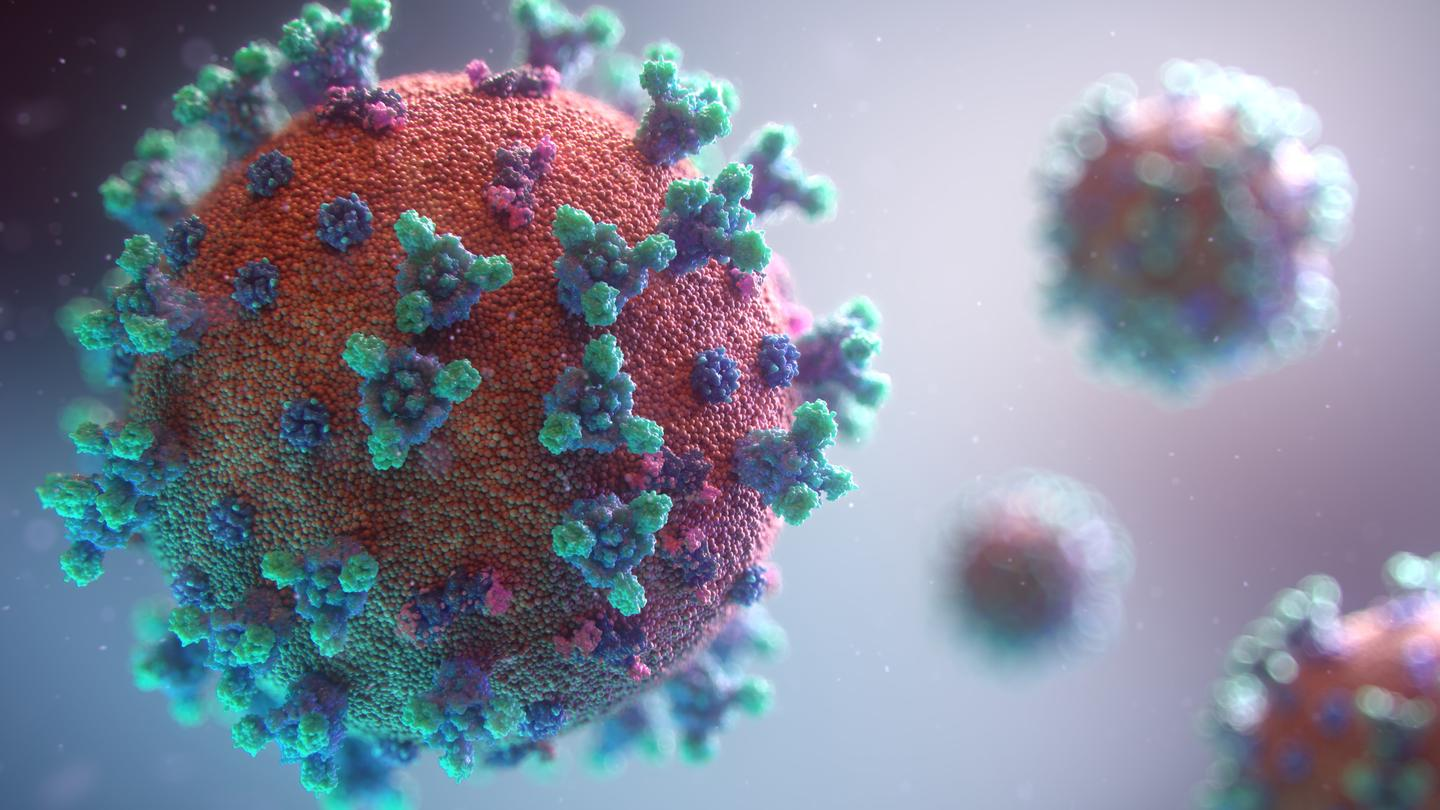

In [3]:
# get current working directory
path_directory = os.getcwd()  

image_path = os.path.join(path_directory, 'images', 'Covid 19.jpg')

display.Image(image_path)

# Fetch Data

In [4]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(url)

# Head and Tail

In [5]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [6]:
df.shape

(206844, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206844 entries, 0 to 206843
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    206844 non-null  object 
 1   continent                                   194886 non-null  object 
 2   location                                    206844 non-null  object 
 3   date                                        206844 non-null  object 
 4   total_cases                                 198471 non-null  float64
 5   new_cases                                   198186 non-null  float64
 6   new_cases_smoothed                          197009 non-null  float64
 7   total_deaths                                179697 non-null  float64
 8   new_deaths                                  179654 non-null  float64
 9   new_deaths_smoothed                         178487 non-null  float64
 

In [8]:
df.dtypes.value_counts()

float64    62
object      5
dtype: int64

In [9]:
df['iso_code'].value_counts(ascending=False).head(10)                     # explore the top ten count for different iso codes

ARG         949
MEX         949
THA         946
TWN         934
MAC         928
OWID_WRL    928
OWID_UMC    928
KOR         928
CHN         928
USA         928
Name: iso_code, dtype: int64

In [10]:
df['continent'].value_counts()                                                                            

Africa           47888
Europe           44903
Asia             44590
North America    31958
Oceania          14028
South America    11519
Name: continent, dtype: int64

In [11]:
round(df['continent'].value_counts(True), 3)                              # calculate the relative frequencies for each continent                        

Africa           0.246
Europe           0.230
Asia             0.229
North America    0.164
Oceania          0.072
South America    0.059
Name: continent, dtype: float64

(-1.136031344662856,
 1.3076377629537945,
 -1.113864706640143,
 1.1071469306200623)

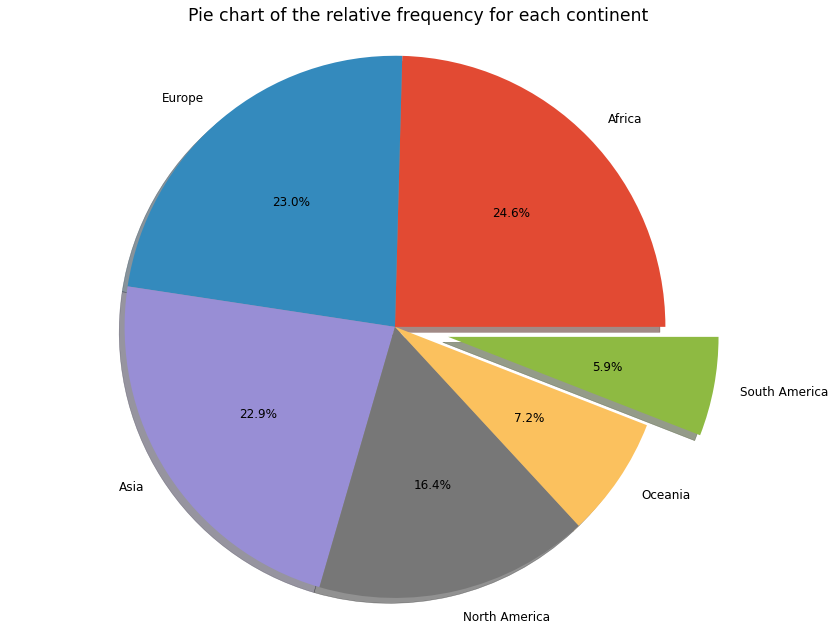

In [12]:
fig, ax = plt.subplots()

plt.pie(
          x=df['continent'].value_counts(True).values, labels=df['continent'].value_counts(True).keys(),
          autopct='%1.1f%%', shadow=True, 
          explode=[0, 0, 0, 0, 0, 0.2]
        )

ax.set(title='Pie chart of the relative frequency for each continent')
ax.axis('equal')

In [13]:
df['location'].value_counts().head(10)

Argentina              949
Mexico                 949
Thailand               946
Taiwan                 934
Macao                  928
World                  928
Upper middle income    928
South Korea            928
China                  928
United States          928
Name: location, dtype: int64

In [14]:
df.describe(include='object')

iso_code continent   location        date      tests_units
count    206844    194886     206844      206844           106786
unique      244         6        244         949                4
top         ARG    Africa  Argentina  2021-09-01  tests performed
freq        949     47888        949         243            80097

In [15]:
df.describe(include='float64')

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98471e+05  1.98186e+05         1.97009e+05   1.79697e+05   
mean   3.81798e+06  1.25814e+04         1.25789e+04   6.90514e+04   
std    2.39668e+07  8.73069e+04         8.52227e+04   3.57798e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.40100e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.15330e+04  6.50000e+01         1.00429e+02   1.03200e+03   
75%    4.46271e+05  1.01300e+03         1.14943e+03   9.09000e+03   
max    5.84102e+08  4.07947e+06         3.43795e+06   6.41788e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179654.00000         178487.00000             197559.00000   
mean      148.21716            148.93354              50068.28067   
std       761.14302            744.67987              91382.95445   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                909.94450   
50%         1.00000              1.71400               8158.78200   
75%        16.00000             17.28600              61425.70600   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197274.00000                    196102.00000   
mean               188.92566                       188.86800   
std                917.44064                       599.37455   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48600   
50%                  9.23800                        19.92550   
75%                102.51450                       135.61925   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              178798.00000            178755.00000   
mean                  637.80598                 1.49974   
std                   925.83238                 5.26365   
min                     0.00000                 0.00000   
25%                    26.35400                 0.00000   
50%                   184.21800                 0.05900   
75%                   946.64775                 1.09700   
max                  6364.67400               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177593.00000       155030.00000   27330.00000   
mean                           1.49916            0.96596     859.45499   
std                            3.45208            0.38095    2502.27512   
min                            0.00000           -0.05000       0.00000   
25%                            0.00500            0.77000      33.00000   
50%                            0.23300            0.98000     170.00000   
75%                            1.48800            1.17000     619.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27330.00000    29252.00000                29252.00000   
mean                   22.24214     4210.76412                  160.29657   
std                    26.72450    10975.92730                  195.85298   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      163.00000                   31.36125   
50%                    11.81500      814.00000                   89.36350   
75%                    31.58275     3199.75000                  207.76825   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6777.00000                         6777.00000   
mean               439.43013                           13.71134   
std                595.01687                           15.44560   
min             

In [16]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))            # convert date to pandas datetime
df.select_dtypes(include='datetime')

date
0      2020-02-24
1      2020-02-25
2      2020-02-26
3      2020-02-27
4      2020-02-28
...           ...
206839 2022-08-02
206840 2022-08-03
206841 2022-08-04
206842 2022-08-05
206843 2022-08-06

[206844 rows x 1 columns]

In [17]:
df['day_name'] = df['date'].dt.day_name()                             # add name of the day
df['day'] = df['date'].dt.day                                         # day
df['month_num'] = df['date'].dt.month                                 # add month number
df['year'] =  df['date'].dt.year                                      # year

df[['year', 'month_num', 'day', 'day_name']]

year  month_num  day   day_name
0       2020          2   24     Monday
1       2020          2   25    Tuesday
2       2020          2   26  Wednesday
3       2020          2   27   Thursday
4       2020          2   28     Friday
...      ...        ...  ...        ...
206839  2022          8    2    Tuesday
206840  2022          8    3  Wednesday
206841  2022          8    4   Thursday
206842  2022          8    5     Friday
206843  2022          8    6   Saturday

[206844 rows x 4 columns]

In [18]:
# assign month names
def assign_month_name(x):
  if x == 1:
    return 'Jan'
  elif x == 2:
    return 'Feb'
  elif x == 3:
     return 'Mar'
  elif x == 4:
    return 'Apr'
  elif x == 5:
    return 'May'
  elif x == 6:
     return 'June'
  elif x == 7:
    return 'July'
  elif x == 8:
    return 'Aug'
  elif x == 9:
    return 'Sep'
  elif x == 10:
    return 'Oct'
  elif x == 11:
    return 'Nov'
  else:
    return 'Dec'

df['month_name'] = df['month_num'].apply(assign_month_name)
df['month_name'].value_counts()

July    21601
May     21595
June    20971
Apr     20655
Mar     19558
Aug     15799
Jan     14887
Feb     14736
Dec     14512
Oct     14479
Nov     14070
Sep     13981
Name: month_name, dtype: int64

In [19]:
# change month name to categorical 
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month_name'] = pd.Categorical(df['month_name'], ordered_months)

df['month_name'].dtype

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
, ordered=False)

[Text(0.5, 1.0, 'Total count by month name'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Month Name')]

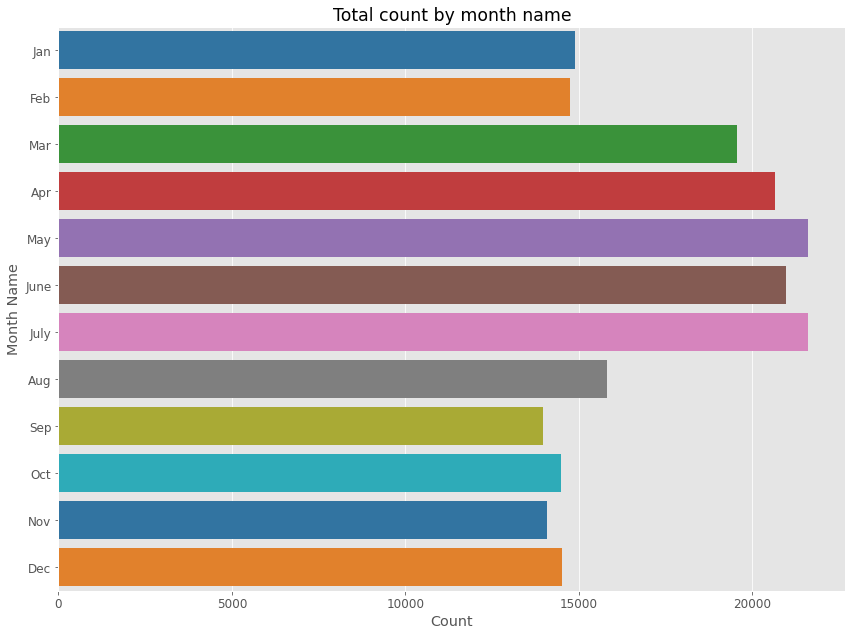

In [20]:
fig, ax = plt.subplots()

sns.countplot(data=df, y='month_name', hue_order='month_name', palette='tab10')

ax.set(title='Total count by month name', xlabel='Count',  ylabel='Month Name')

# Missing Data Exploration

In [21]:
df.isna().sum()                                                              # over 50 % missing data in some columns

iso_code                                           0
continent                                      11958
location                                           0
date                                               0
total_cases                                     8373
new_cases                                       8658
new_cases_smoothed                              9835
total_deaths                                   27147
new_deaths                                     27190
new_deaths_smoothed                            28357
total_cases_per_million                         9285
new_cases_per_million                           9570
new_cases_smoothed_per_million                 10742
total_deaths_per_million                       28046
new_deaths_per_million                         28089
new_deaths_smoothed_per_million                29251
reproduction_rate                              51814
icu_patients                                  179514
icu_patients_per_million                      

<AxesSubplot:>

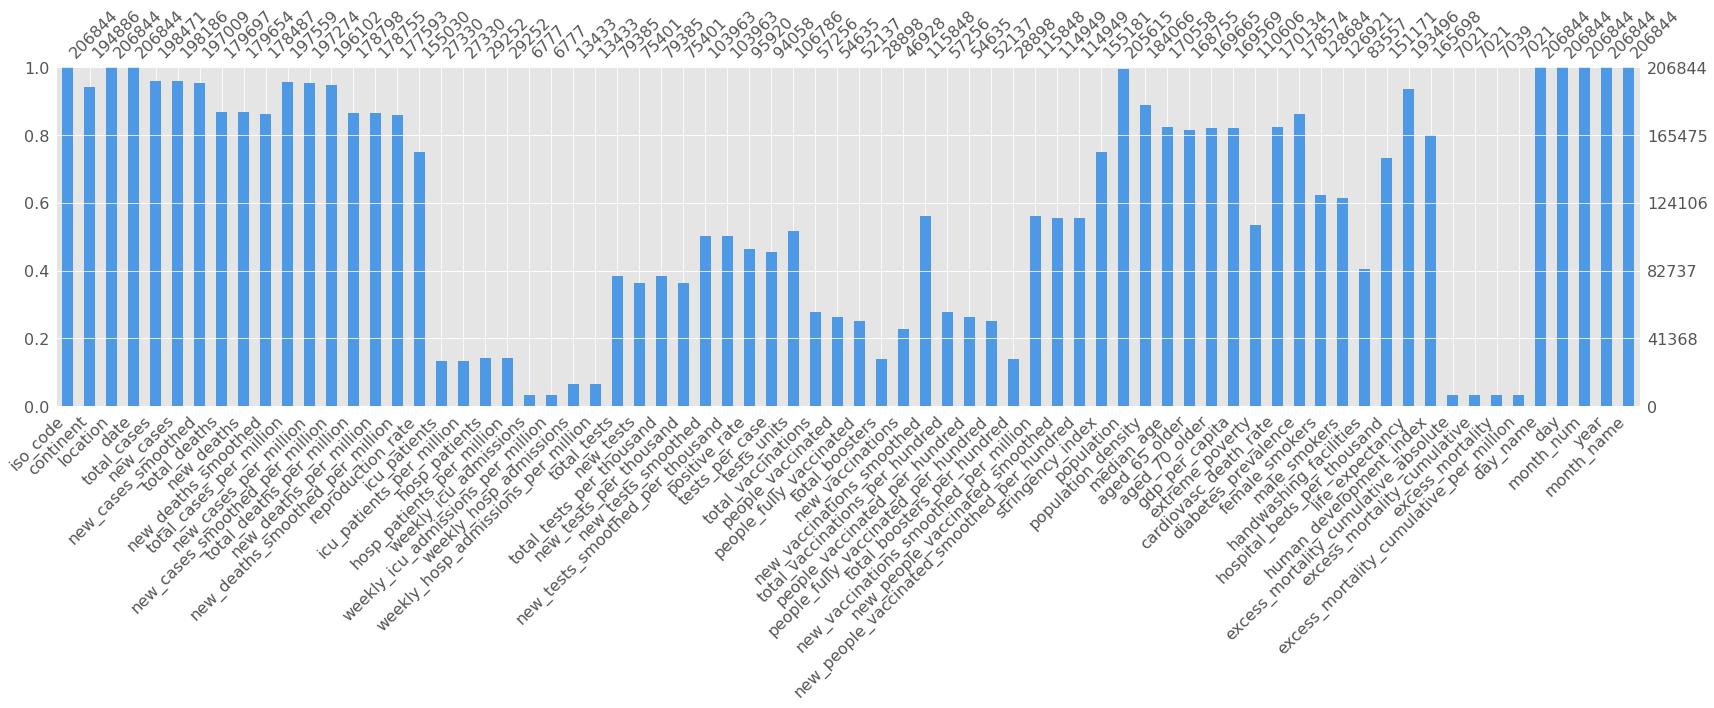

In [22]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9))                              # plot missing values for each column

<AxesSubplot:>

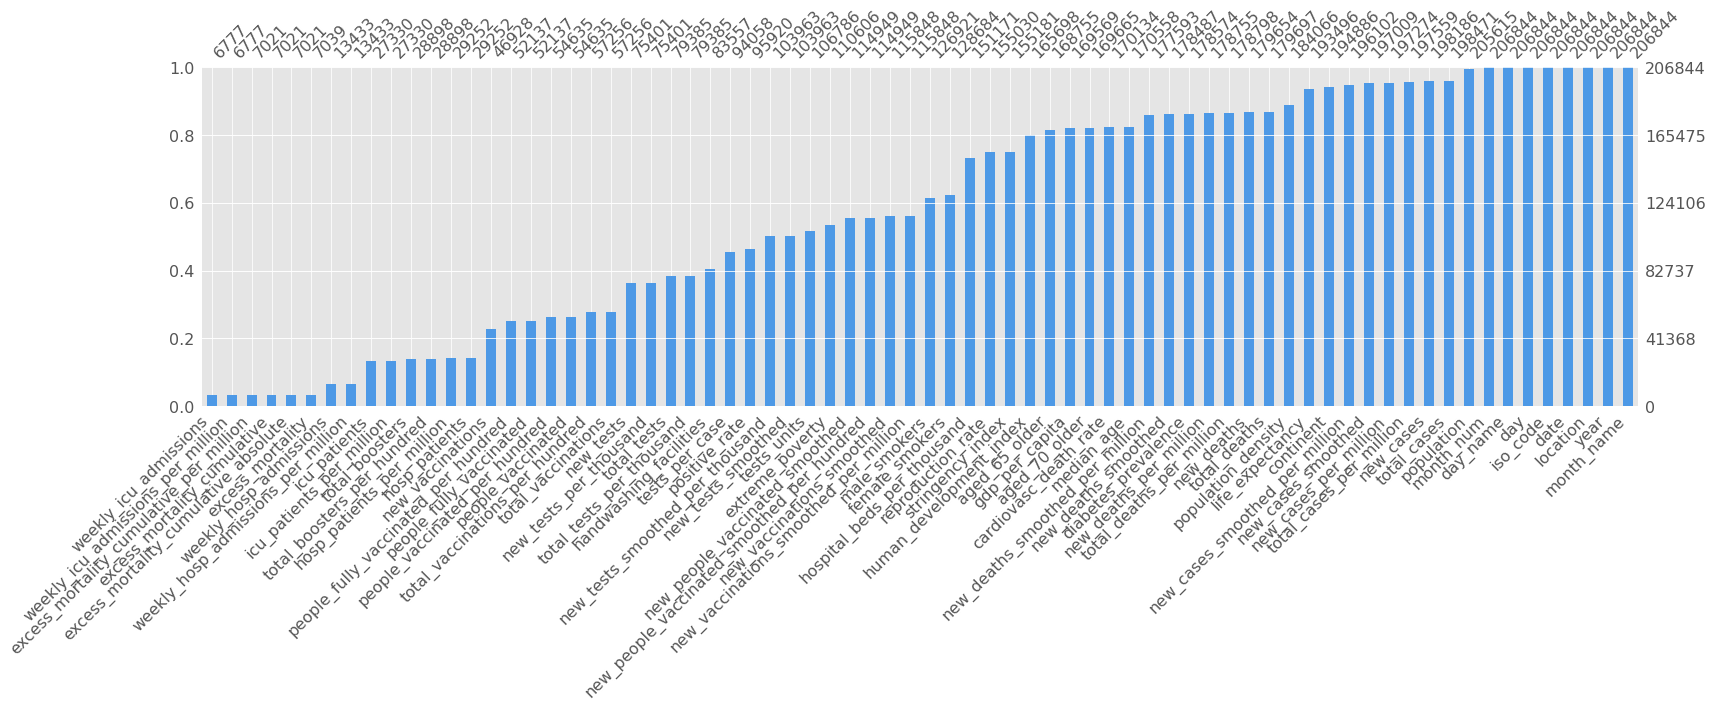

In [23]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9), sort='ascending') 

In [24]:
# filter for missing values based on the column with the highest values missing
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
206839      ZWE    Africa     Zimbabwe 2022-08-02     256403.0       21.0   
206840      ZWE    Africa     Zimbabwe 2022-08-03     256423.0       20.0   
206841      ZWE    Africa     Zimbabwe 2022-08-04     256444.0       21.0   
206842      ZWE    Africa     Zimbabwe 2022-08-05     256444.0        0.0   
206843      ZWE    Africa     Zimbabwe 2022-08-06     256444.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
206839              17.000        5578.0         1.0                0.571   
206840              15.429        5579.0         1.0                0.714   
206841              15.429        5581.0         2.0                0.714   
206842               9.714        5581.0         0.0                0.571   
206843               9.714        5581.0         0.0                0.571   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
206839                16031.676                  1.313   
206840                16032.927                  1.251   
206841                16034.240                  1.313   
206842                16034.240                  0.000   
206843                16034.240                  0.000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
206839                           1.063                   348.766   
206840                           0.965                   348.829   
206841                           0.965                   348.954   
206842                           0.607                   348.954   
206843                           0.607                   348.954   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
206839                   0.063                            0.036   
206840                   0.063                            0.045   
206841                   0.125          

Common strategies that can be used to handle missing data for this project may include:
1) ignoring the missing data
2) dropping records with missing data
3) filling the missing data

In [25]:
# droping missing data based on rows containing missing values results in an empty dataframe   
df.dropna(axis='index')

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million, day_name, day, month_num, year, month_name]
Index: []

In [26]:
# dropping missing values based on columns also returns an a smaller dataframe as almost all columns contains a missing value
df.dropna(axis='columns')

iso_code     location       date   day_name  day  month_num  year  \
0           AFG  Afghanistan 2020-02-24     Monday   24          2  2020   
1           AFG  Afghanistan 2020-02-25    Tuesday   25          2  2020   
2           AFG  Afghanistan 2020-02-26  Wednesday   26          2  2020   
3           AFG  Afghanistan 2020-02-27   Thursday   27          2  2020   
4           AFG  Afghanistan 2020-02-28     Friday   28          2  2020   
...         ...          ...        ...        ...  ...        ...   ...   
206839      ZWE     Zimbabwe 2022-08-02    Tuesday    2          8  2022   
206840      ZWE     Zimbabwe 2022-08-03  Wednesday    3          8  2022   
206841      ZWE     Zimbabwe 2022-08-04   Thursday    4          8  2022   
206842      ZWE     Zimbabwe 2022-08-05     Friday    5          8  2022   
206843      ZWE     Zimbabwe 2022-08-06   Saturday    6          8  2022   

       month_name  
0             Feb  
1             Feb  
2             Feb  
3             Feb  
4             Feb  
...           ...  
206839        Aug  
206840        Aug  
206841        Aug  
206842        Aug  
206843        Aug  

[206844 rows x 8 columns]

Filling the missing data

In [27]:
# filling missing values with a constant value will not be a good decision for instance in total cases or deaths that varies for different locations
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
206839      ZWE    Africa     Zimbabwe 2022-08-02     256403.0       21.0   
206840      ZWE    Africa     Zimbabwe 2022-08-03     256423.0       20.0   
206841      ZWE    Africa     Zimbabwe 2022-08-04     256444.0       21.0   
206842      ZWE    Africa     Zimbabwe 2022-08-05     256444.0        0.0   
206843      ZWE    Africa     Zimbabwe 2022-08-06     256444.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
206839              17.000        5578.0         1.0                0.571   
206840              15.429        5579.0         1.0                0.714   
206841              15.429        5581.0         2.0                0.714   
206842               9.714        5581.0         0.0                0.571   
206843               9.714        5581.0         0.0                0.571   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
206839                16031.676                  1.313   
206840                16032.927                  1.251   
206841                16034.240                  1.313   
206842                16034.240                  0.000   
206843                16034.240                  0.000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
206839                           1.063                   348.766   
206840                           0.965                   348.829   
206841                           0.965                   348.954   
206842                           0.607                   348.954   
206843                           0.607                   348.954   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
206839                   0.063                            0.036   
206840                   0.063                            0.045   
206841                   0.125          

Fill with Mean / Median of Group

In [28]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('mean')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.93257e+05  1.93257e+05         1.93257e+05   1.89997e+05   
mean   3.77578e+06  1.22963e+04         1.22894e+04   6.47199e+04   
std    2.42609e+07  8.80473e+04         8.58597e+04   3.49008e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.89400e+03  0.00000e+00         5.85700e+00   7.40000e+01   
50%    3.62250e+04  5.40000e+01         8.55710e+01   7.39000e+02   
75%    3.71846e+05  8.63000e+02         9.61429e+02   6.87800e+03   
max    5.84102e+08  4.07947e+06         3.43795e+06   6.41788e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  189997.00000         189997.00000             192345.00000   
mean      138.71579            139.24812              46872.63140   
std       741.00156            724.18592              87894.86893   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.09614                821.35000   
50%         1.00000              1.28600               7026.82600   
75%        12.00000             13.14300              56337.95700   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           192345.00000                    192345.00000   
mean               177.19359                       176.55154   
std                908.31670                       580.21403   
min                  0.00000                         0.00000   
25%                  0.00000                         1.32700   
50%                  7.85600                        17.55400   
75%                 91.98600                       124.72000   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              189085.00000            189085.00000   
mean                  591.49301                 1.47324   
std                   886.17274                 5.09794   
min                     0.00000                 0.00000   
25%                    26.31200                 0.00000   
50%                   171.61500                 0.09274   
75%                   854.70100                 1.18600   
max                  6364.67400               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     189085.00000       160701.00000   27981.00000   
mean                           1.46431            0.95886     791.74300   
std                            3.32956            0.37226    2603.88752   
min                            0.00000           -0.05000       0.00000   
25%                            0.00900            0.77000      26.00000   
50%                            0.24900            0.98000      95.00000   
75%                            1.54200            1.15000     466.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27981.00000    28944.00000                28944.00000   
mean                   19.05169     4070.79888                  155.84493   
std                    22.66624    11196.76300                  189.11980   
min                     0.00000        0.00000                    0.00000   
25%                     4.58900      156.00000                   36.34375   
50%                     9.85100      787.00000                   84.46500   
75%                    26.85100     3070.00000                  206.86800   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             9513.00000                         9513.00000   
mean               180.14362                           11.80913   
std                310.66305                            9.02870   
min             

In [29]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('median')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.93257e+05  1.93257e+05         1.93257e+05   1.89997e+05   
mean   3.77500e+06  1.22893e+04         1.22591e+04   6.47961e+04   
std    2.42606e+07  8.80476e+04         8.58147e+04   3.49182e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.83300e+03  0.00000e+00         5.71400e+00   7.30000e+01   
50%    3.62030e+04  5.40000e+01         8.47140e+01   7.35000e+02   
75%    3.70634e+05  8.54000e+02         9.42714e+02   6.85100e+03   
max    5.84102e+08  4.07947e+06         3.43795e+06   6.41788e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  189997.00000         189997.00000             192345.00000   
mean      138.17881            138.71332              46804.76676   
std       740.91272            724.02640              87880.13674   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000                816.99100   
50%         1.00000              1.14300               7019.53700   
75%        11.00000             12.42900              56284.28300   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           192345.00000                    192345.00000   
mean               176.20182                       174.99703   
std                908.25003                       579.96642   
min                  0.00000                         0.00000   
25%                  0.00000                         1.29500   
50%                  7.70100                        17.22300   
75%                 90.54800                       122.02500   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              189085.00000            189085.00000   
mean                  594.27112                 1.34418   
std                   889.52545                 5.08770   
min                     0.00000                 0.00000   
25%                    25.61500                 0.00000   
50%                   170.95500                 0.00900   
75%                   859.28200                 0.85400   
max                  6364.67400               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     189085.00000       160701.00000   27981.00000   
mean                           1.38143            0.95611     774.60107   
std                            3.33377            0.37327    2567.07987   
min                            0.00000           -0.05000       0.00000   
25%                            0.00000            0.77000      25.00000   
50%                            0.19200            0.98000      94.00000   
75%                            1.30700            1.15000     461.50000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27981.00000    28944.00000                28944.00000   
mean                   18.70122     3857.46426                  150.18616   
std                    23.07302    10887.51952                  188.58369   
min                     0.00000        0.00000                    0.00000   
25%                     3.77200      155.00000                   35.97600   
50%                     9.31300      743.00000                   79.40150   
75%                    26.02400     2992.25000                  184.57100   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             9513.00000                         9513.00000   
mean               150.60612                            8.41368   
std                289.07616                            4.63947   
min             

In [30]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98471e+05  1.98186e+05         1.97009e+05   1.79697e+05   
mean   3.81798e+06  1.25814e+04         1.25789e+04   6.90514e+04   
std    2.39668e+07  8.73069e+04         8.52227e+04   3.57798e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.40100e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.15330e+04  6.50000e+01         1.00429e+02   1.03200e+03   
75%    4.46271e+05  1.01300e+03         1.14943e+03   9.09000e+03   
max    5.84102e+08  4.07947e+06         3.43795e+06   6.41788e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179654.00000         178487.00000             197559.00000   
mean      148.21716            148.93354              50068.28067   
std       761.14302            744.67987              91382.95445   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                909.94450   
50%         1.00000              1.71400               8158.78200   
75%        16.00000             17.28600              61425.70600   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197274.00000                    196102.00000   
mean               188.92566                       188.86800   
std                917.44064                       599.37455   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48600   
50%                  9.23800                        19.92550   
75%                102.51450                       135.61925   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              178798.00000            178755.00000   
mean                  637.80598                 1.49974   
std                   925.83238                 5.26365   
min                     0.00000                 0.00000   
25%                    26.35400                 0.00000   
50%                   184.21800                 0.05900   
75%                   946.64775                 1.09700   
max                  6364.67400               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177593.00000       155030.00000   27330.00000   
mean                           1.49916            0.96596     859.45499   
std                            3.45208            0.38095    2502.27512   
min                            0.00000           -0.05000       0.00000   
25%                            0.00500            0.77000      33.00000   
50%                            0.23300            0.98000     170.00000   
75%                            1.48800            1.17000     619.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27330.00000    29252.00000                29252.00000   
mean                   22.24214     4210.76412                  160.29657   
std                    26.72450    10975.92730                  195.85298   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      163.00000                   31.36125   
50%                    11.81500      814.00000                   89.36350   
75%                    31.58275     3199.75000                  207.76825   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6777.00000                         6777.00000   
mean               439.43013                           13.71134   
std                595.01687                           15.44560   
min             

Forward Fill & Back Fill within Groups

In [31]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('ffill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.91702e+05  1.91702e+05         1.90556e+05   1.72963e+05   
mean   3.80250e+06  1.23929e+04         1.23831e+04   6.98828e+04   
std    2.43562e+07  8.83994e+04         8.63543e+04   3.64541e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.03400e+03  0.00000e+00         6.00000e+00   9.70000e+01   
50%    3.66610e+04  5.50000e+01         8.64290e+01   9.02000e+02   
75%    3.73836e+05  8.67000e+02         9.55714e+02   7.88000e+03   
max    5.84102e+08  4.07947e+06         3.43795e+06   6.41788e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  173162.00000         172052.00000             190790.00000   
mean      150.81440            151.49555              47053.34446   
std       774.73891            758.05619              88155.93134   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                849.90700   
50%         1.00000              1.57100               7061.42950   
75%        14.00000             15.00000              56746.07100   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           190790.00000                    189649.00000   
mean               178.59368                       177.00407   
std                914.78211                       584.20580   
min                  0.00000                         0.00000   
25%                  0.00000                         1.33600   
50%                  7.90500                        17.40100   
75%                 91.82700                       123.18900   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              172064.00000            172263.00000   
mean                  608.62822                 1.46704   
std                   912.78881                 5.48381   
min                     0.00000                 0.00000   
25%                    24.63300                 0.00000   
50%                   170.82300                 0.04500   
75%                   888.47000                 1.01000   
max                  6364.67400               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     171158.00000       149043.00000   24986.00000   
mean                           1.45781            0.96069     724.98143   
std                            3.46285            0.38425    2565.17265   
min                            0.00000           -0.05000       0.00000   
25%                            0.00200            0.76000      22.00000   
50%                            0.20800            0.98000      94.00000   
75%                            1.38800            1.16000     385.75000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               24986.00000    26628.00000                26628.00000   
mean                   18.37773     3724.77726                  153.25451   
std                    23.63156    11005.94265                  196.91668   
min                     0.00000        0.00000                    0.00000   
25%                     3.05050      129.00000                   28.57800   
50%                     8.46400      679.00000                   83.51350   
75%                    24.32200     2542.00000                  189.84400   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6215.00000                         6215.00000   
mean                53.20611                           12.97360   
std                113.94129                           21.16166   
min             

In [32]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.93257e+05  1.93116e+05         1.93116e+05   1.89997e+05   
mean   3.77191e+06  1.22941e+04         1.22169e+04   6.36176e+04   
std    2.42604e+07  8.80799e+04         8.57917e+04   3.48389e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.75000e+03  0.00000e+00         5.28600e+00   4.10000e+01   
50%    3.54230e+04  5.20000e+01         8.07140e+01   6.18000e+02   
75%    3.67275e+05  8.47000e+02         9.22143e+02   6.36300e+03   
max    5.84102e+08  4.07947e+06         3.43795e+06   6.41788e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  189940.00000         189940.00000             192345.00000   
mean      137.61505            137.25717              46672.99834   
std       740.99030            722.82232              87899.88324   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                788.31200   
50%         1.00000              1.00000               6843.57800   
75%        11.00000             11.57100              55960.29900   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           192204.00000                    192204.00000   
mean               176.20435                       174.39535   
std                908.62943                       580.36858   
min                  0.00000                         0.00000   
25%                  0.00000                         1.22300   
50%                  7.66950                        16.24850   
75%                 89.78650                       120.02250   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              189085.00000            189028.00000   
mean                  555.35191                 2.84346   
std                   887.12776                12.88367   
min                     0.00000                 0.00000   
25%                    14.67700                 0.00000   
50%                   119.09000                 0.09000   
75%                   757.70400                 1.33600   
max                  6364.67400               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     189028.00000       159962.00000   27514.00000   
mean                           1.62555            0.98684     732.63688   
std                            3.92154            0.43075    2543.78127   
min                            0.00000           -0.05000       0.00000   
25%                            0.00800            0.77000      22.00000   
50%                            0.22000            0.98000      92.00000   
75%                            1.53200            1.19000     374.75000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27514.00000    28199.00000                28199.00000   
mean                   17.78037     3783.57367                  145.24476   
std                    22.89281    10973.90578                  193.09161   
min                     0.00000        0.00000                    0.00000   
25%                     2.81725      138.00000                   25.94900   
50%                     8.92900      679.00000                   74.67200   
75%                    24.04700     2506.00000                  179.38650   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             9217.00000                         9217.00000   
mean               138.56396                           11.30335   
std                331.08275                           18.25248   
min             

In [33]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98471e+05  1.98186e+05         1.97009e+05   1.79697e+05   
mean   3.81798e+06  1.25814e+04         1.25789e+04   6.90514e+04   
std    2.39668e+07  8.73069e+04         8.52227e+04   3.57798e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.40100e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.15330e+04  6.50000e+01         1.00429e+02   1.03200e+03   
75%    4.46271e+05  1.01300e+03         1.14943e+03   9.09000e+03   
max    5.84102e+08  4.07947e+06         3.43795e+06   6.41788e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179654.00000         178487.00000             197559.00000   
mean      148.21716            148.93354              50068.28067   
std       761.14302            744.67987              91382.95445   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                909.94450   
50%         1.00000              1.71400               8158.78200   
75%        16.00000             17.28600              61425.70600   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197274.00000                    196102.00000   
mean               188.92566                       188.86800   
std                917.44064                       599.37455   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48600   
50%                  9.23800                        19.92550   
75%                102.51450                       135.61925   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              178798.00000            178755.00000   
mean                  637.80598                 1.49974   
std                   925.83238                 5.26365   
min                     0.00000                 0.00000   
25%                    26.35400                 0.00000   
50%                   184.21800                 0.05900   
75%                   946.64775                 1.09700   
max                  6364.67400               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177593.00000       155030.00000   27330.00000   
mean                           1.49916            0.96596     859.45499   
std                            3.45208            0.38095    2502.27512   
min                            0.00000           -0.05000       0.00000   
25%                            0.00500            0.77000      33.00000   
50%                            0.23300            0.98000     170.00000   
75%                            1.48800            1.17000     619.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27330.00000    29252.00000                29252.00000   
mean                   22.24214     4210.76412                  160.29657   
std                    26.72450    10975.92730                  195.85298   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      163.00000                   31.36125   
50%                    11.81500      814.00000                   89.36350   
75%                    31.58275     3199.75000                  207.76825   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6777.00000                         6777.00000   
mean               439.43013                           13.71134   
std                595.01687                           15.44560   
min             

Combining FFill and BFill

In [34]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('ffill').transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.00067e+05  2.00067e+05         2.00067e+05   2.00067e+05   
mean   3.64352e+06  1.18747e+04         1.17959e+04   6.04157e+04   
std    2.38538e+07  8.65671e+04         8.43177e+04   3.39792e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    1.89300e+03  0.00000e+00         3.85700e+00   2.20000e+01   
50%    3.01220e+04  4.20000e+01         7.11430e+01   4.20000e+02   
75%    3.36400e+05  7.75000e+02         8.51000e+02   5.64900e+03   
max    5.84102e+08  4.07947e+06         3.43795e+06   6.41788e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  200067.00000         200067.00000             200067.00000   
mean      130.70627            130.37308              44871.74568   
std       722.56822            704.92707              86654.42267   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                578.21500   
50%         1.00000              0.85700               5479.17700   
75%         9.00000             10.14300              52837.57300   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           200067.00000                    200067.00000   
mean               170.55117                       167.86546   
std                894.07427                       570.13004   
min                  0.00000                         0.00000   
25%                  0.00000                         0.83200   
50%                  6.27100                        13.71300   
75%                 84.32700                       111.70800   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              200067.00000            200067.00000   
mean                  525.03119                 2.85464   
std                   871.56629                12.69080   
min                     0.00000                 0.00000   
25%                    10.33200                 0.00000   
50%                    97.53500                 0.09000   
75%                   676.45300                 1.26500   
max                  6364.67400               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     200067.00000       200067.00000  189070.00000   
mean                           1.58211            1.09071     275.54495   
std                            3.85272            0.64415    1093.70030   
min                            0.00000           -0.05000       0.00000   
25%                            0.00900            0.80000       0.00000   
50%                            0.18500            1.01000      10.00000   
75%                            1.45400            1.26000      88.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count              189070.00000   189070.00000               189070.00000   
mean                    7.45633     1367.15455                   44.82781   
std                    13.37290     4760.53388                   92.32876   
min                     0.00000        0.00000                    0.00000   
25%                     0.00000        1.00000                    0.05700   
50%                     0.97200       87.00000                   14.94200   
75%                     8.91100      587.00000                   63.30300   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count           168761.00000                       168761.00000   
mean               214.45988                            9.83554   
std                583.75190                           12.12155   
min             

In [35]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98471e+05  1.98186e+05         1.97009e+05   1.79697e+05   
mean   3.81798e+06  1.25814e+04         1.25789e+04   6.90514e+04   
std    2.39668e+07  8.73069e+04         8.52227e+04   3.57798e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.40100e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.15330e+04  6.50000e+01         1.00429e+02   1.03200e+03   
75%    4.46271e+05  1.01300e+03         1.14943e+03   9.09000e+03   
max    5.84102e+08  4.07947e+06         3.43795e+06   6.41788e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179654.00000         178487.00000             197559.00000   
mean      148.21716            148.93354              50068.28067   
std       761.14302            744.67987              91382.95445   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                909.94450   
50%         1.00000              1.71400               8158.78200   
75%        16.00000             17.28600              61425.70600   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197274.00000                    196102.00000   
mean               188.92566                       188.86800   
std                917.44064                       599.37455   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48600   
50%                  9.23800                        19.92550   
75%                102.51450                       135.61925   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              178798.00000            178755.00000   
mean                  637.80598                 1.49974   
std                   925.83238                 5.26365   
min                     0.00000                 0.00000   
25%                    26.35400                 0.00000   
50%                   184.21800                 0.05900   
75%                   946.64775                 1.09700   
max                  6364.67400               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177593.00000       155030.00000   27330.00000   
mean                           1.49916            0.96596     859.45499   
std                            3.45208            0.38095    2502.27512   
min                            0.00000           -0.05000       0.00000   
25%                            0.00500            0.77000      33.00000   
50%                            0.23300            0.98000     170.00000   
75%                            1.48800            1.17000     619.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27330.00000    29252.00000                29252.00000   
mean                   22.24214     4210.76412                  160.29657   
std                    26.72450    10975.92730                  195.85298   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      163.00000                   31.36125   
50%                    11.81500      814.00000                   89.36350   
75%                    31.58275     3199.75000                  207.76825   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6777.00000                         6777.00000   
mean               439.43013                           13.71134   
std                595.01687                           15.44560   
min             

In [36]:
# the best approach to fill missing values for this project is to group based on each location, and fill values with the means of each column
df_filled = df.fillna(df.groupby('location').transform('mean'))
df_filled.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0           209.91456    4311.04729     8.94118              8.99088   
1           209.91456    4311.04729     8.94118              8.99088   
2           209.91456    4311.04729     8.94118              8.99088   
3           209.91456    4311.04729     8.94118              8.99088   
4           209.91456    4311.04729     8.94118              8.99088   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                         5.23485                 107.50887   
1                         5.23485                 107.50887   
2                         5.23485                 107.50887   
3                         5.23485                 107.50887   
4                         5.23485                 107.50887   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                 0.22304                          0.22426             1.0659   
1                 0.22304                          0.22426             1.0659   
2                 0.22304                          0.22426             1.0659   
3                 0.22304                          0.22426             1.0659   
4                 0.22304                          0.22426             1.0659   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN     924645.2        NaN   
1                                 NaN     924645.2        NaN   
2                                 NaN     924645.2        NaN   
3                                 NaN     924645.2        NaN   
4                                 NaN     924645.2        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.2118                     NaN           983.55396   
1                   23.2118                     NaN           983.55396   
2                   23.2118                     NaN           983.55396   
3                   23.2118                     NaN           983.55396   
4                   23.2118                     NaN           983.55396   

   new_tests_smoothed_per_thousa

<AxesSubplot:>

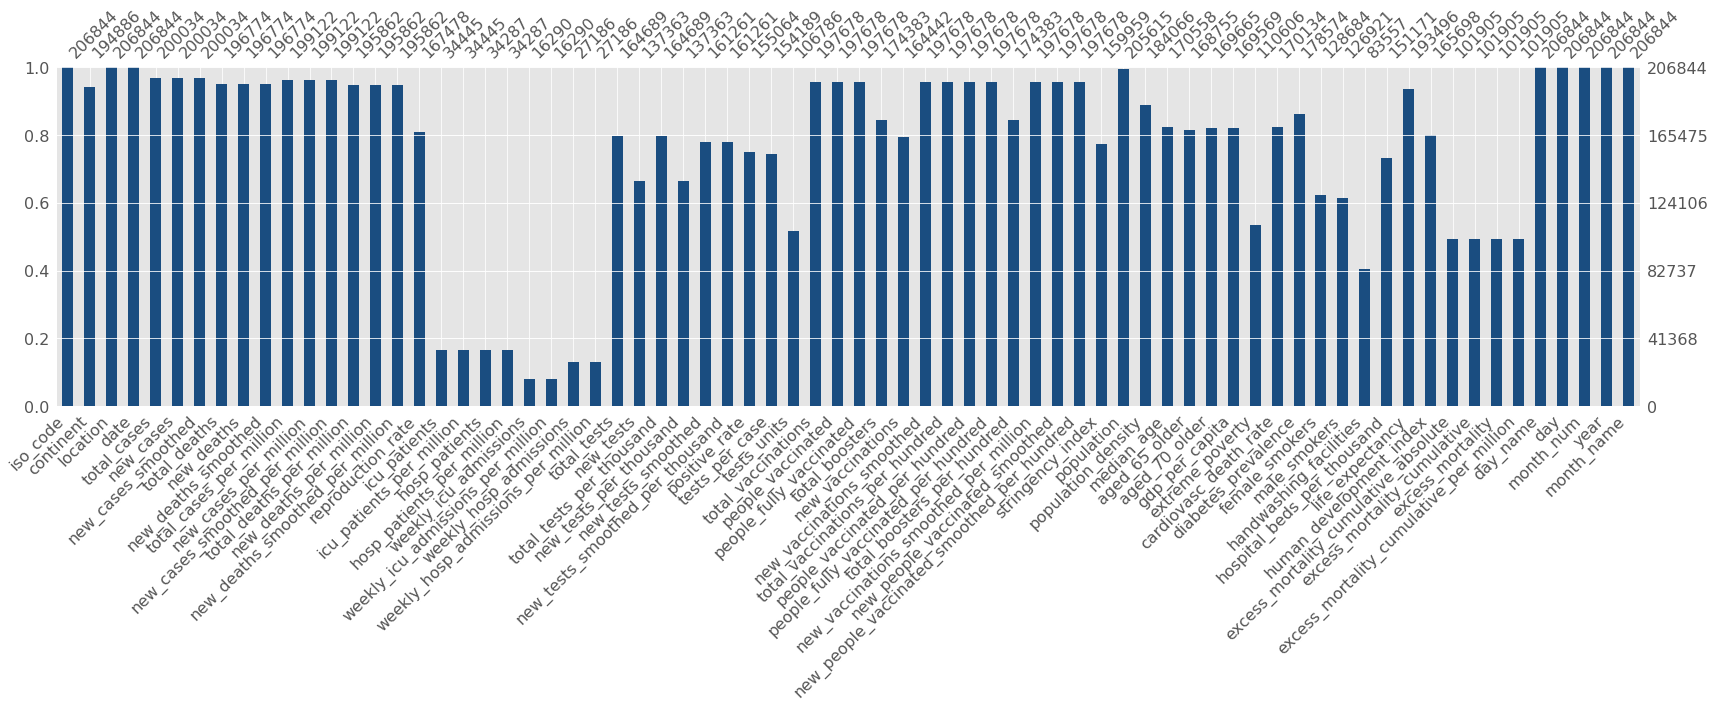

In [37]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5))

<AxesSubplot:>

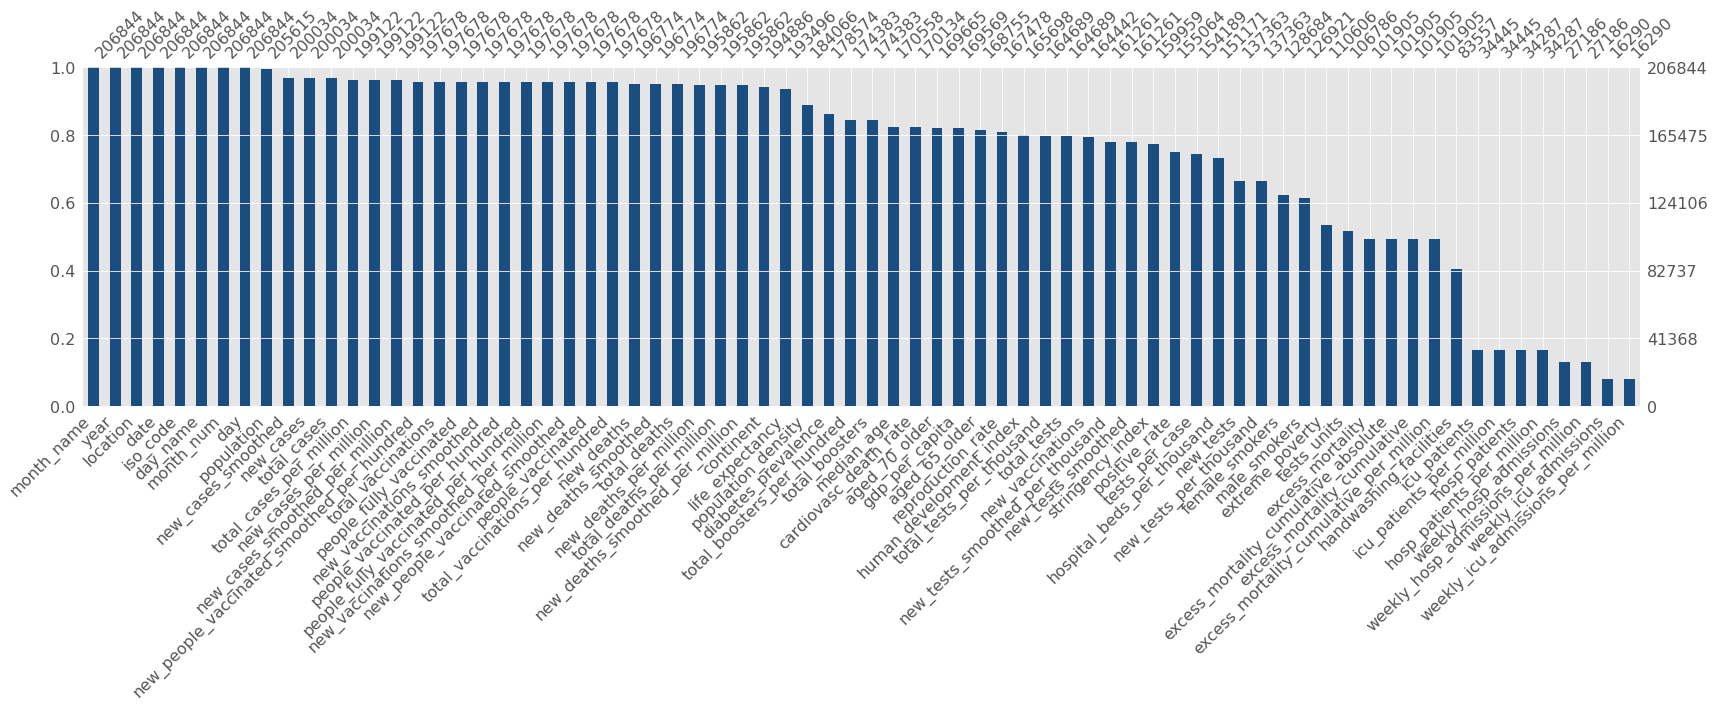

In [38]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5), sort='descending')

In [39]:
df_filled.drop(columns=['day', 'month_num', 'year']).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.00034e+05  2.00034e+05         2.00034e+05   1.96774e+05   
mean   3.79191e+06  1.24809e+04         1.24736e+04   6.41256e+04   
std    2.38758e+07  8.69104e+04         8.46866e+04   3.43081e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.25025e+03  0.00000e+00         6.71400e+00   8.30000e+01   
50%    4.06660e+04  6.40000e+01         9.94290e+01   8.24000e+02   
75%    4.41388e+05  1.01200e+03         1.15357e+03   8.12000e+03   
max    5.84102e+08  4.07947e+06         3.43795e+06   6.41788e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  196774.00000         196774.00000             199122.00000   
mean      136.61966            137.14954              49872.37704   
std       728.63189            712.00186              91119.94260   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                891.71300   
50%         1.00000              1.42900               8090.45300   
75%        14.00000             15.14300              61190.95500   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           199122.00000                    199122.00000   
mean               188.46755                       188.44109   
std                913.37836                       595.33399   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48100   
50%                  9.22400                        20.19750   
75%                103.21700                       137.62225   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              195862.00000            195862.00000   
mean                  618.87386                 1.50832   
std                   899.90544                 5.05406   
min                     0.00000                 0.00000   
25%                    28.10900                 0.00000   
50%                   183.47600                 0.11200   
75%                   925.26100                 1.26700   
max                  6364.67400               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     195862.00000       167478.00000   34445.00000   
mean                           1.50322            0.96301     823.32015   
std                            3.32763            0.37012    2401.87201   
min                            0.00000           -0.05000       0.00000   
25%                            0.01200            0.78000      31.00000   
50%                            0.27100            0.98000     148.00000   
75%                            1.63700            1.15000     630.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               34445.00000    34287.00000                34287.00000   
mean                   21.17568     4373.68387                  157.71500   
std                    24.91216    10810.07555                  185.00505   
min                     0.00000        0.00000                    0.00000   
25%                     4.99366      188.00000                   37.60450   
50%                    11.98900      861.26897                   90.63100   
75%                    30.67700     3782.00000                  211.64450   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            16290.00000                        16290.00000   
mean               288.01254                           12.60049   
std                469.00989                           12.15409   
min             

# Compute Pairwise Correlation

In [40]:
cor_mat = df_filled.drop(columns=['day', 'month_num', 'year']).corr()
cor_mat 

total_cases  new_cases  \
total_cases                                     1.00000    0.73397   
new_cases                                       0.73397    1.00000   
new_cases_smoothed                              0.75512    0.97281   
total_deaths                                    0.93856    0.72938   
new_deaths                                      0.51563    0.64744   
new_deaths_smoothed                             0.53204    0.63397   
total_cases_per_million                         0.09861    0.06636   
new_cases_per_million                           0.01986    0.07297   
new_cases_smoothed_per_million                  0.03109    0.09320   
total_deaths_per_million                        0.12032    0.08165   
new_deaths_per_million                          0.00228    0.02935   
new_deaths_smoothed_per_million                 0.00435    0.03590   
reproduction_rate                               0.01034    0.02836   
icu_patients                                    0.46947    0.53750   
icu_patients_per_million                        0.04147    0.14031   
hosp_patients                                   0.54767    0.67062   
hosp_patients_per_million                       0.01754    0.11979   
weekly_icu_admissions                           0.31723    0.37460   
weekly_icu_admissions_per_million              -0.03866    0.08161   
weekly_hosp_admissions                          0.56372    0.64807   
weekly_hosp_admissions_per_million              0.07486    0.26204   
total_tests                                     0.18286    0.09953   
new_tests                                       0.56276    0.52797   
total_tests_per_thousand                        0.05531    0.04627   
new_tests_per_thousand                         -0.01000    0.03537   
new_tests_smoothed                              0.07846    0.07455   
new_tests_smoothed_per_thousand                 0.00954    0.05701   
positive_rate                                   0.04276    0.14796   
tests_per_case                                 -0.01394   -0.01079   
total_vaccinations                              0.73022    0.55868   
people_vaccinated                               0.70831    0.54856   
people_fully_vaccinated                         0.70873    0.54676   
total_boosters                                  0.67898    0.48178   
new_vaccinations                                0.48751    0.48141   
new_vaccinations_smoothed                       0.50074    0.48644   
total_vaccinations_per_hundred                  0.14636    0.10931   
people_vaccinated_per_hundred                   0.12977    0.09212   
people_fully_vaccinated_per_hundred             0.12226    0.08997   
total_boosters_per_hundred                      0.02782    0.01620   
new_vaccinations_smoothed_per_million          -0.00674    0.01092   
new_people_vaccinated_smoothed                  0.41661    0.38982   
new_people_vaccinated_smoothed_per_hundred     -0.02939   -0.02346   
stringency_index                               -0.05411    0.01676   
population                                      0.61189    0.53828   
population_density                             -0.01630   -0.01480   
median_age                                      0.03636    0.04235   
aged_65_older                                   0.03572    0.04330   
aged_70_older                                   0.03381    0.04257   
gdp_per_capita                                  0.01490    0.01914   
extreme_poverty                                -0.03601   -0.03517   
cardiovasc_death_rate                          -0.03980   -0.04395   
diabetes_prevalence                             0.00482    0.00079   
female_smokers                                  0.00136    0.00658   
male_smokers                                   -0.00392    0.00024   
handwashing_facilities                          0.03206    0.03024   
hospital_beds_per_thousand                      0.00047    0.01281   
life_expectancy                                 0.0175

In [41]:
cor_mat['total_deaths'].sort_values(ascending=False)

total_deaths                                  1.00000
total_cases                                   0.93856
excess_mortality_cumulative_absolute          0.76368
new_cases_smoothed                            0.74745
total_vaccinations                            0.74162
people_vaccinated                             0.73550
new_cases                                     0.72938
people_fully_vaccinated                       0.71958
population                                    0.70021
new_deaths_smoothed                           0.68394
weekly_hosp_admissions                        0.66576
new_deaths                                    0.66322
hosp_patients                                 0.64560
new_vaccinations_smoothed                     0.63315
new_vaccinations                              0.61914
icu_patients                                  0.61868
total_boosters                                0.60953
new_people_vaccinated_smoothed                0.55896
new_tests                   

<AxesSubplot:>

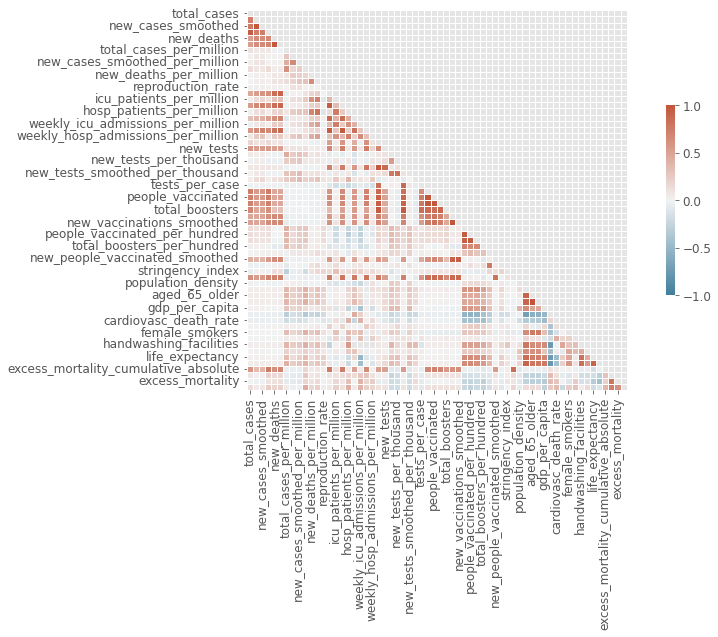

In [42]:
mask = np.triu(np.ones_like(cor_mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor_mat, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Check Duplication

In [43]:
df_filled.duplicated().sum()

0

# Exploratory Data Analysis

Create helper functions to visualize datasets

In [44]:
from matplotlib.ticker import FuncFormatter

# helper functions to format y-axis
def billion(x, pos):
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# barplot helper function
def plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create a figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart 
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, ci=ci, color=color, 
        hue_order=hue_order, order=order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_bar


# line chart helper function
def plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create a figure and axis 
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, size=size, markers=markers, style=style, ci=ci,
        hue_order=hue_order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line


# helper function to get specific date range
def get_data(data, before=None, after=None, rule=None):
    return data.set_index('date').sort_index(ascending=True, axis='index').truncate(before, after).resample(rule)

# helper function to plot line chart
def plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, 
        hue=hue, hue_order=hue_order, palette=palette,
        ax=ax
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_date_rng

# Cases Exploration

In [45]:
cases_cols = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million',
              'new_cases_per_million', 'new_cases_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_cases = df_filled[cases_cols] 
df_cases.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_cases_per_million  new_cases_per_million  \
0           209.91456                    0.125                  0.125   
1           209.91456                    0.125                  0.000   
2           209.91456                    0.125                  0.000   
3           209.91456                    0.125                  0.000   
4           209.91456                    0.125                  0.000   

   new_cases_smoothed_per_million  year  month_num month_name  day   day_name  
0                         5.23485  2020          2        Feb   24     Monday  
1                         5.23485  2020          2        Feb   25    Tuesday  
2                         5.23485  2020          2        Feb   26  Wednesday  
3                         5.23485  2020          2        Feb   27   Thursday  
4                         5.23485  2020          2        Feb   28     Friday

In [46]:
df_cases.drop(columns=['year', 'month_num', 'day', 'day_name']).describe()

total_cases    new_cases  new_cases_smoothed  total_cases_per_million  \
count  2.00034e+05  2.00034e+05         2.00034e+05             199122.00000   
mean   3.79191e+06  1.24809e+04         1.24736e+04              49872.37704   
std    2.38758e+07  8.69104e+04         8.46866e+04              91119.94260   
min    1.00000e+00  0.00000e+00         0.00000e+00                  0.00100   
25%    3.25025e+03  0.00000e+00         6.71400e+00                891.71300   
50%    4.06660e+04  6.40000e+01         9.94290e+01               8090.45300   
75%    4.41388e+05  1.01200e+03         1.15357e+03              61190.95500   
max    5.84102e+08  4.07947e+06         3.43795e+06             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  
count           199122.00000                    199122.00000  
mean               188.46755                       188.44109  
std                913.37836                       595.33399  
min                  0.00000                         0.00000  
25%                  0.00000                         1.48100  
50%                  9.22400                        20.19750  
75%                103.21700                       137.62225  
max             195005.31300                     35258.84300

In [47]:
df_cases.isna().sum()                                   # check missing values

iso_code                              0
continent                         11958
location                              0
date                                  0
total_cases                        6810
new_cases                          6810
new_cases_smoothed                 6810
total_cases_per_million            7722
new_cases_per_million              7722
new_cases_smoothed_per_million     7722
year                                  0
month_num                             0
month_name                            0
day                                   0
day_name                              0
dtype: int64

<AxesSubplot:>

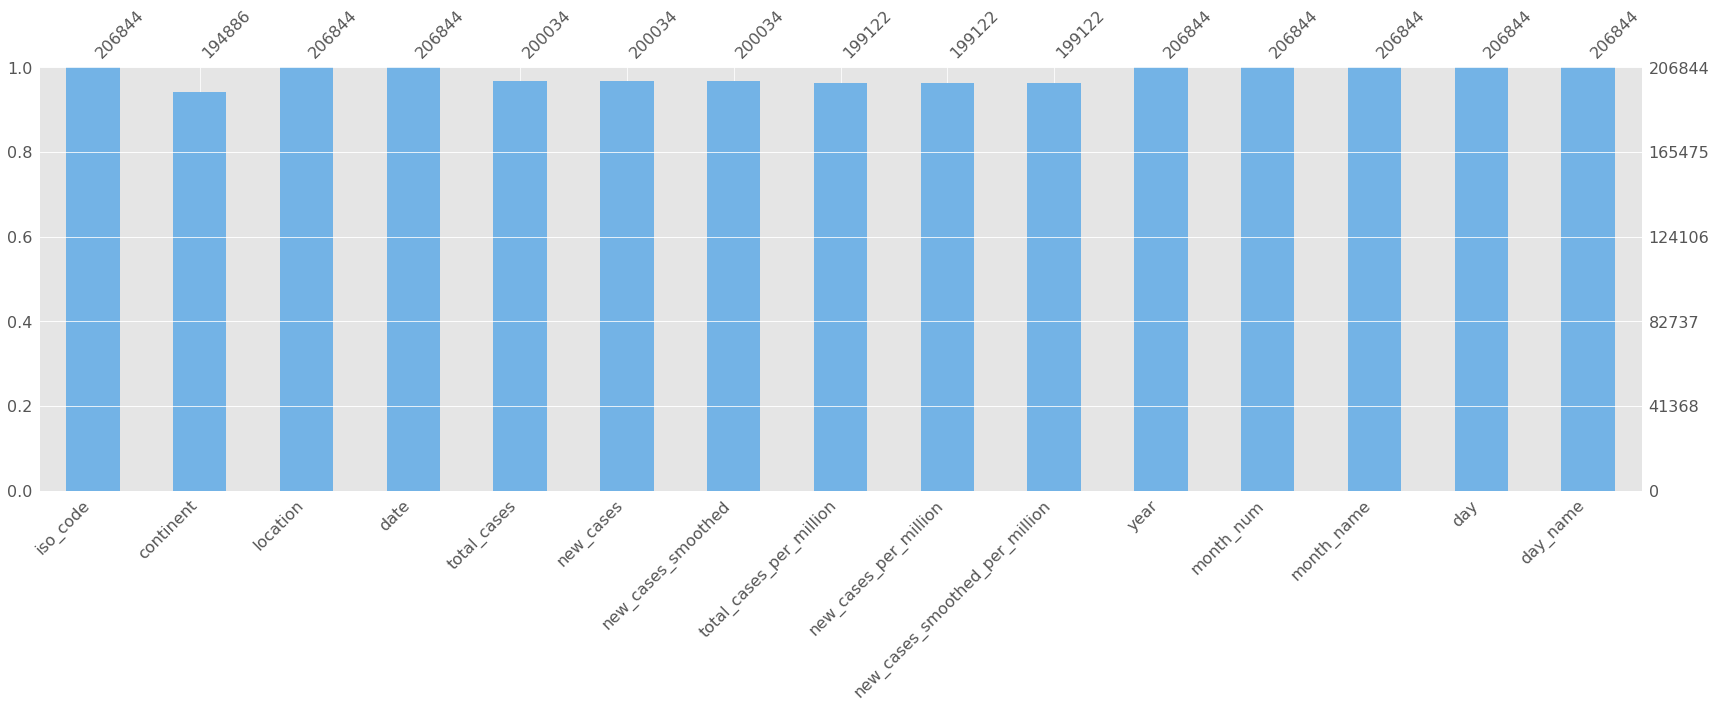

In [48]:
msno.bar(df_cases, labels=True, color=(0.45, 0.70, 0.90))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

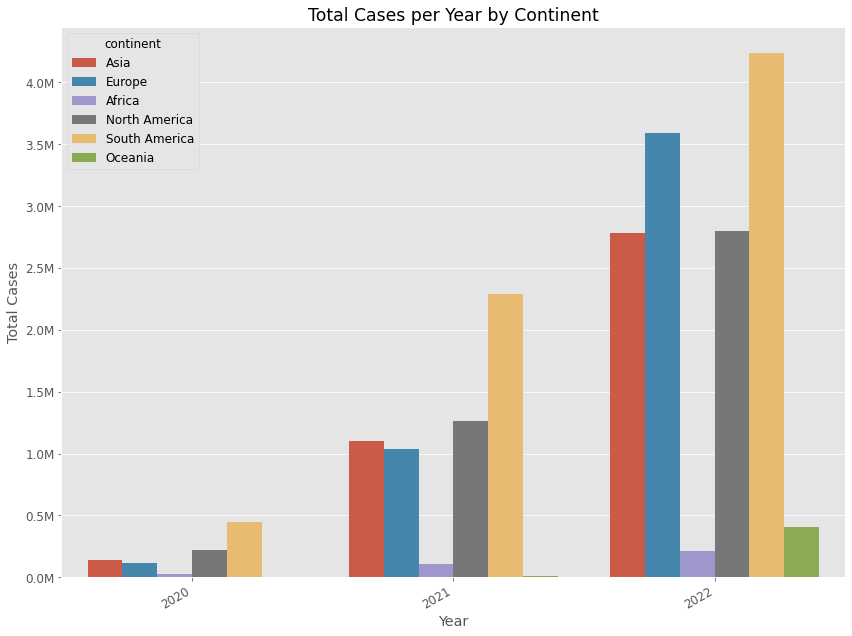

In [49]:
plot_bar(
    data=df_cases,
    x='year', y='total_cases', hue='continent', 
    title='Total Cases per Year by Continent', xlabel='Year', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

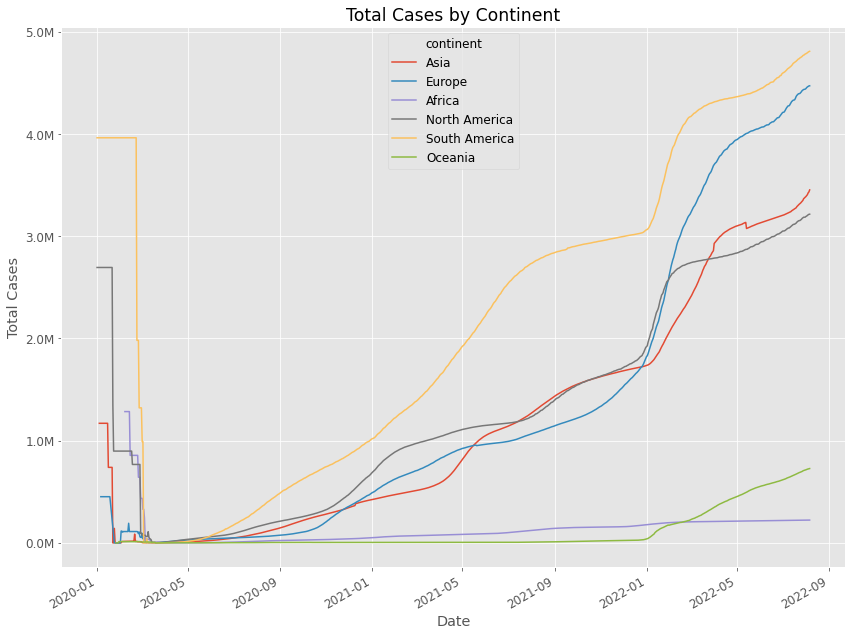

In [50]:
plot_line(
    data=df_cases,
    x='date', y='total_cases', hue='continent', 
    title='Total Cases by Continent', xlabel='Date', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

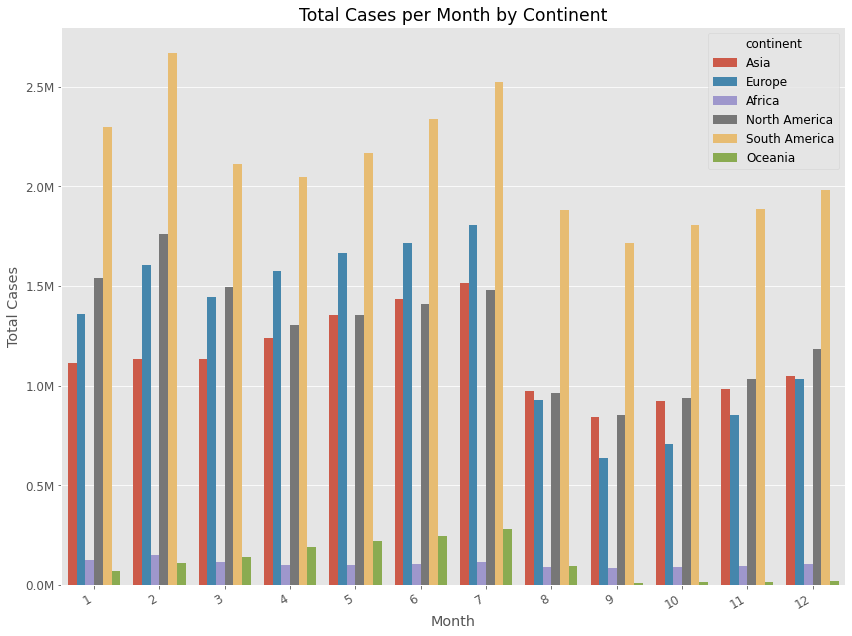

In [51]:
plot_bar(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

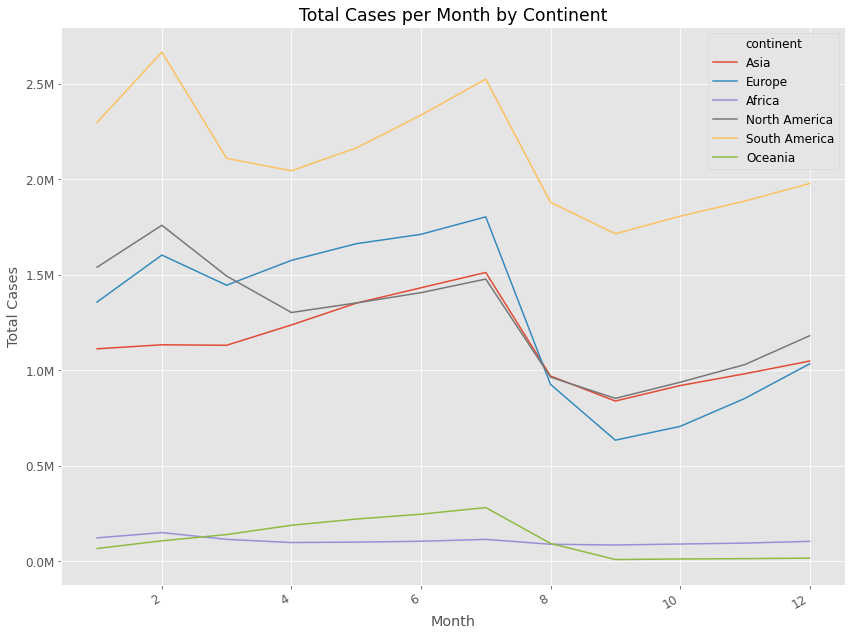

In [52]:
plot_line(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases',
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

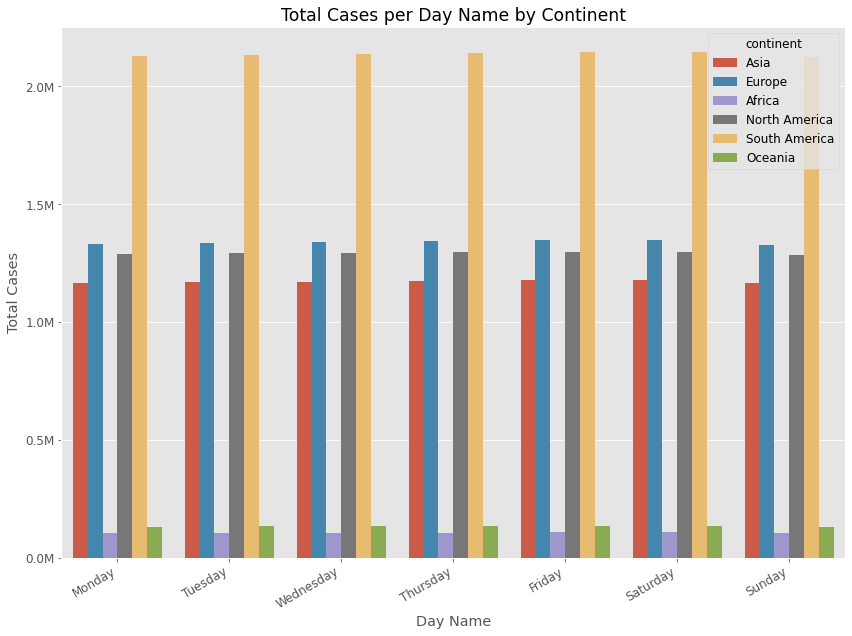

In [53]:
plot_bar(
    data=df_cases,
    x='day_name', y='total_cases', hue='continent', 
    title='Total Cases per Day Name by Continent', xlabel='Day Name', ylabel='Total Cases', 
    formatter=format_mill
)

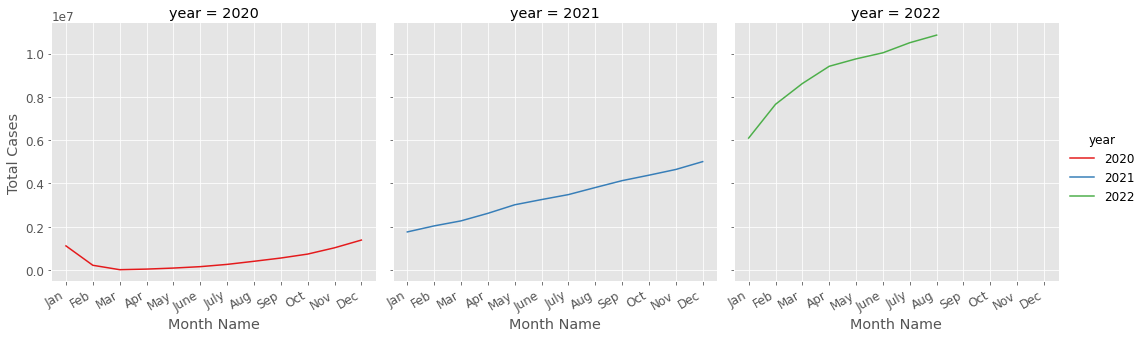

In [54]:
g = sns.relplot(
  data=df_cases,
  x='month_name', y='total_cases', ci=None,
  col='year', hue='year', palette='Set1',
  kind='line'
)

g.set(xlabel='Month Name', ylabel='Total Cases')
g.fig.autofmt_xdate()

# Deaths Exploration

In [55]:
deaths_cols = ['iso_code', 'continent', 'location', 'date', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 
               'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_deaths = df_filled[deaths_cols]
df_deaths.head()

iso_code continent     location       date  total_deaths  new_deaths  \
0      AFG      Asia  Afghanistan 2020-02-24    4311.04729     8.94118   
1      AFG      Asia  Afghanistan 2020-02-25    4311.04729     8.94118   
2      AFG      Asia  Afghanistan 2020-02-26    4311.04729     8.94118   
3      AFG      Asia  Afghanistan 2020-02-27    4311.04729     8.94118   
4      AFG      Asia  Afghanistan 2020-02-28    4311.04729     8.94118   

   new_deaths_smoothed  total_deaths_per_million  new_deaths_per_million  \
0              8.99088                 107.50887                 0.22304   
1              8.99088                 107.50887                 0.22304   
2              8.99088                 107.50887                 0.22304   
3              8.99088                 107.50887                 0.22304   
4              8.99088                 107.50887                 0.22304   

   new_deaths_smoothed_per_million  year  month_num month_name  day   day_name  
0                          0.22426  2020          2        Feb   24     Monday  
1                          0.22426  2020          2        Feb   25    Tuesday  
2                          0.22426  2020          2        Feb   26  Wednesday  
3                          0.22426  2020          2        Feb   27   Thursday  
4                          0.22426  2020          2        Feb   28     Friday

In [56]:
df_deaths[['total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']].describe()

total_deaths    new_deaths  new_deaths_smoothed  \
count   1.96774e+05  196774.00000         196774.00000   
mean    6.41256e+04     136.61966            137.14954   
std     3.43081e+05     728.63189            712.00186   
min     1.00000e+00       0.00000              0.00000   
25%     8.30000e+01       0.00000              0.14300   
50%     8.24000e+02       1.00000              1.42900   
75%     8.12000e+03      14.00000             15.14300   
max     6.41788e+06   18191.00000          14817.14300   

       total_deaths_per_million  new_deaths_per_million  \
count              195862.00000            195862.00000   
mean                  618.87386                 1.50832   
std                   899.90544                 5.05406   
min                     0.00000                 0.00000   
25%                    28.10900                 0.00000   
50%                   183.47600                 0.11200   
75%                   925.26100                 1.26700   
max                  6364.67400               553.80300   

       new_deaths_smoothed_per_million  
count                     195862.00000  
mean                           1.50322  
std                            3.32763  
min                            0.00000  
25%                            0.01200  
50%                            0.27100  
75%                            1.63700  
max                          148.67300

In [57]:
df_deaths.isna().sum()                                   # check missing values

iso_code                               0
continent                          11958
location                               0
date                                   0
total_deaths                       10070
new_deaths                         10070
new_deaths_smoothed                10070
total_deaths_per_million           10982
new_deaths_per_million             10982
new_deaths_smoothed_per_million    10982
year                                   0
month_num                              0
month_name                             0
day                                    0
day_name                               0
dtype: int64

<AxesSubplot:>

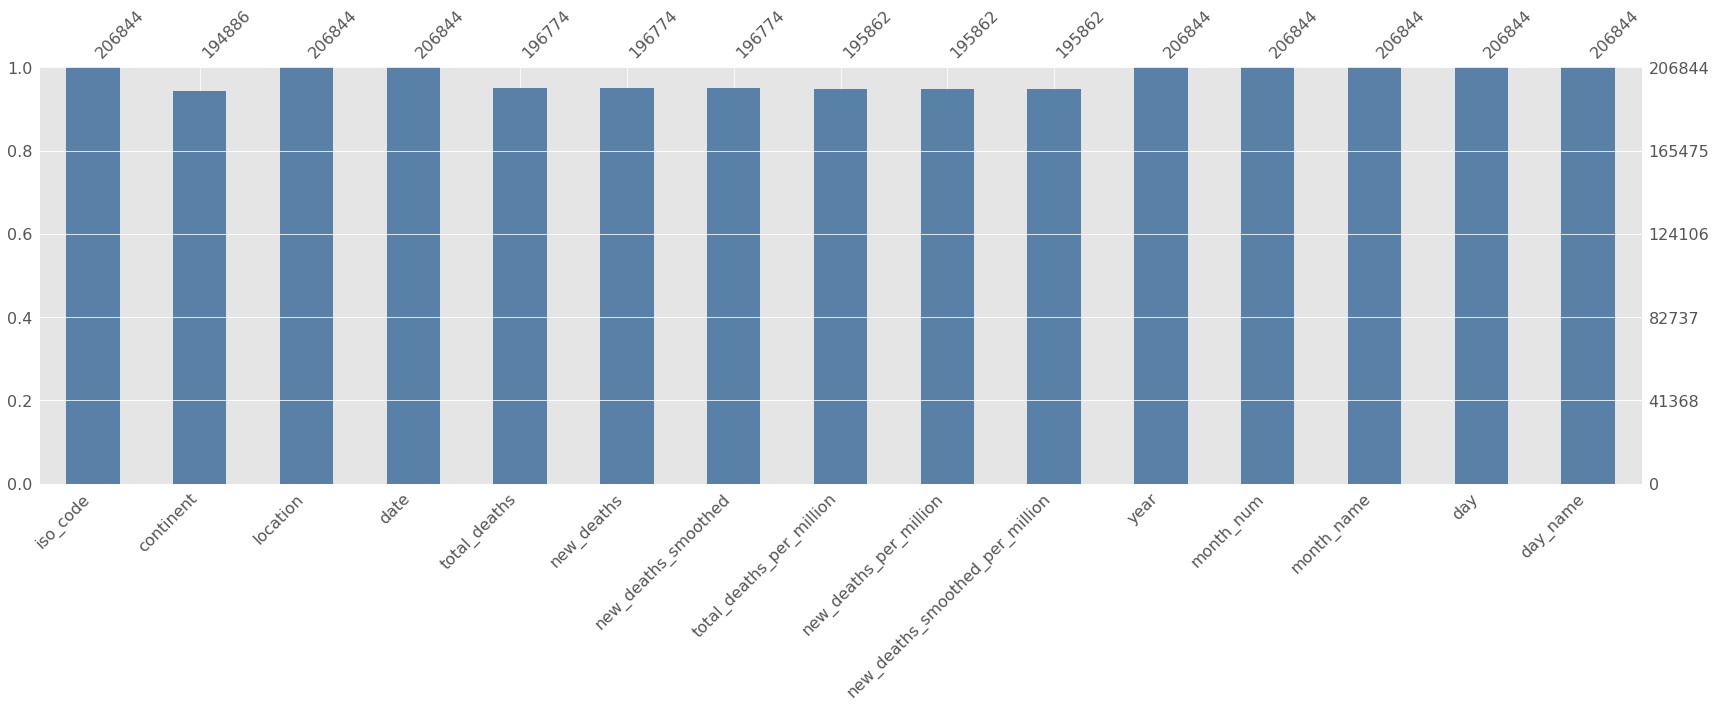

In [58]:
msno.bar(df_deaths, labels=True, color=(0.35, 0.50, 0.65))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

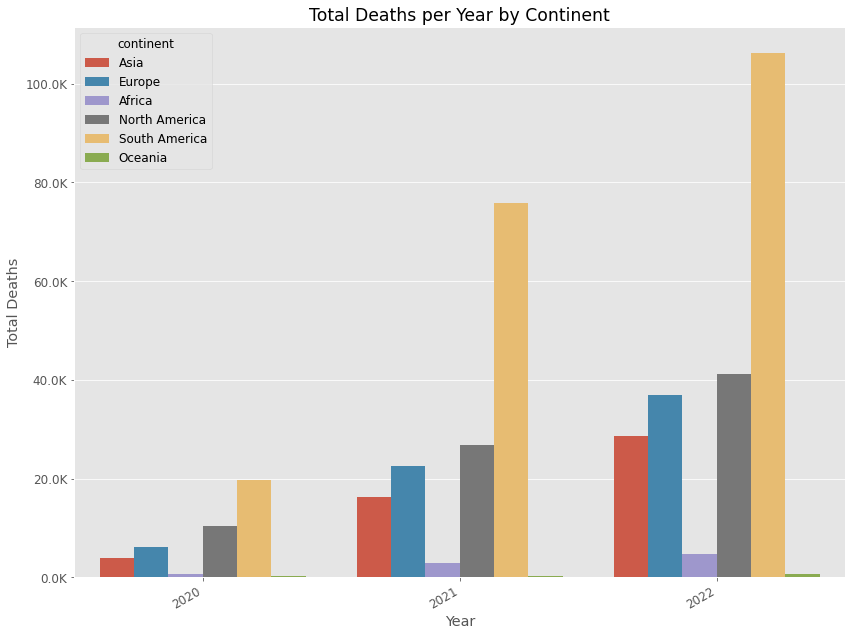

In [59]:
plot_bar(
    data=df_deaths,
    x='year', y='total_deaths', hue='continent', 
    title='Total Deaths per Year by Continent', xlabel='Year', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

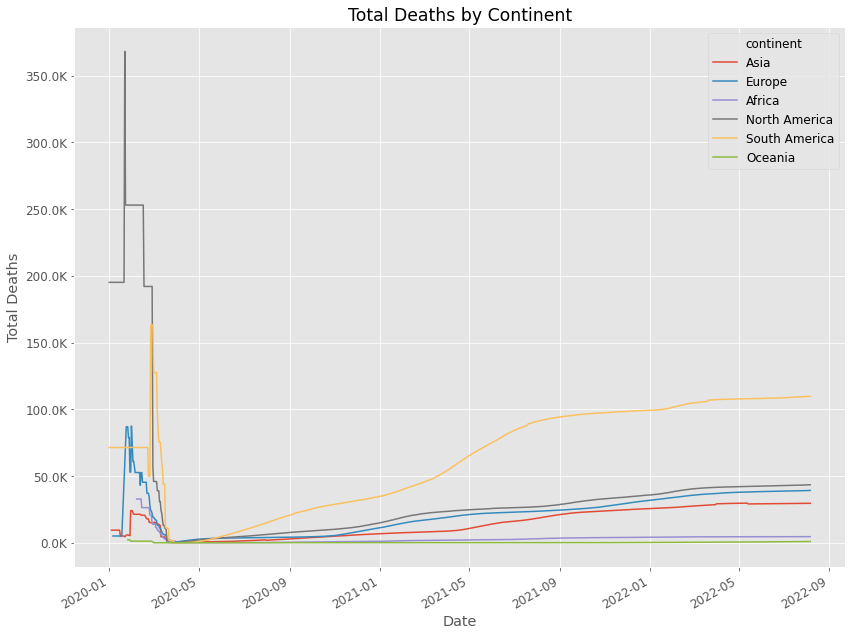

In [60]:
plot_line(
    data=df_deaths,
    x='date', y='total_deaths', hue='continent', 
    title='Total Deaths by Continent', xlabel='Date', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

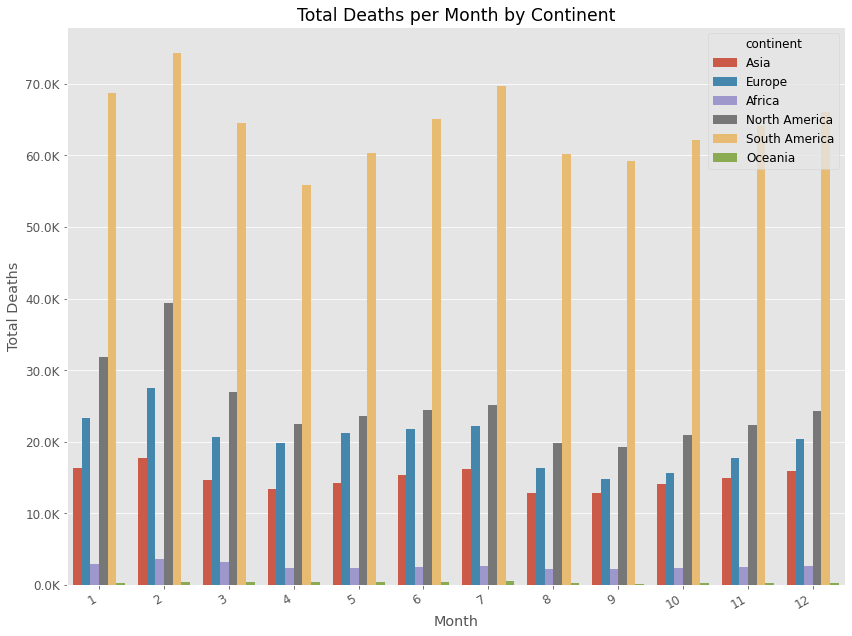

In [61]:
plot_bar(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

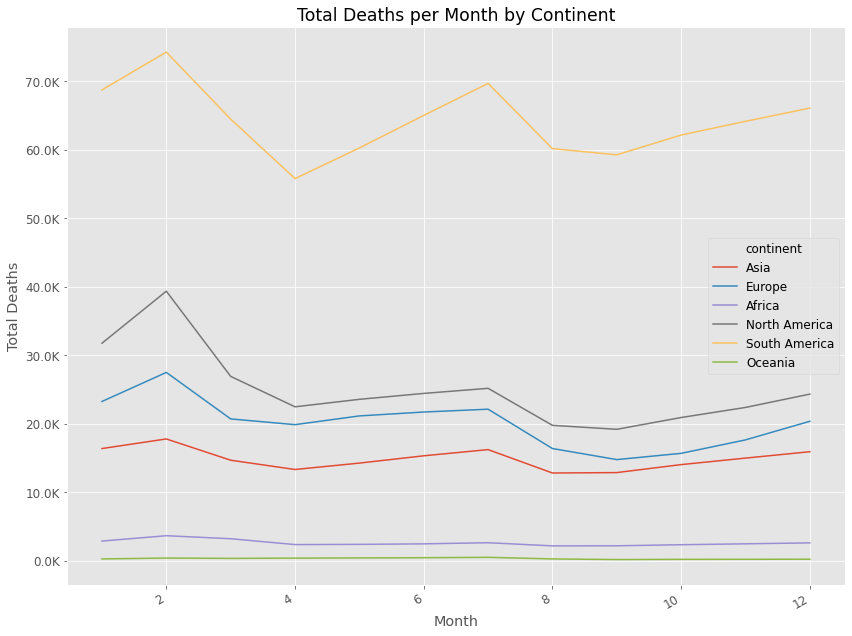

In [62]:
plot_line(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

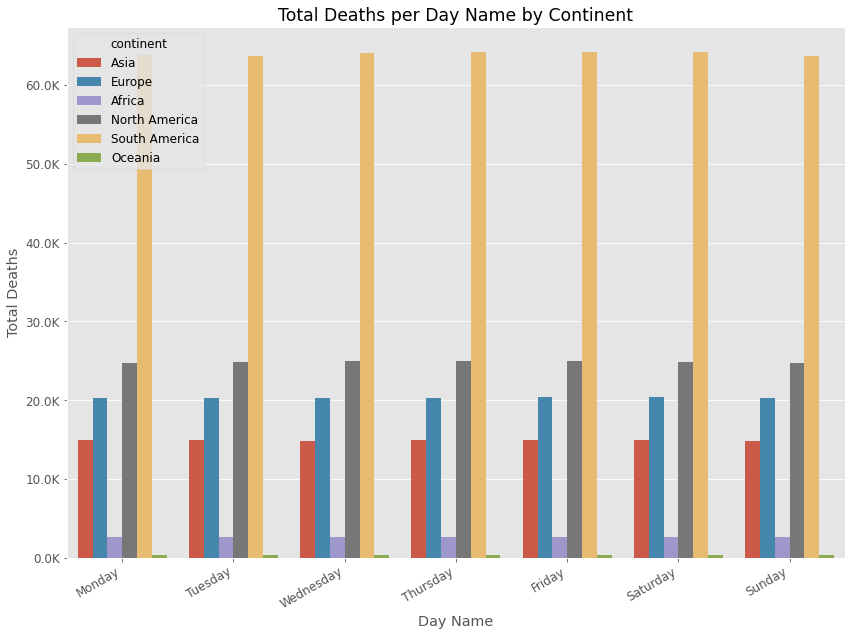

In [63]:
plot_bar(
    data=df_deaths,
    x='day_name', y='total_deaths', hue='continent', 
    title='Total Deaths per Day Name by Continent', xlabel='Day Name', ylabel='Total Deaths', 
    formatter=format_tsd
)

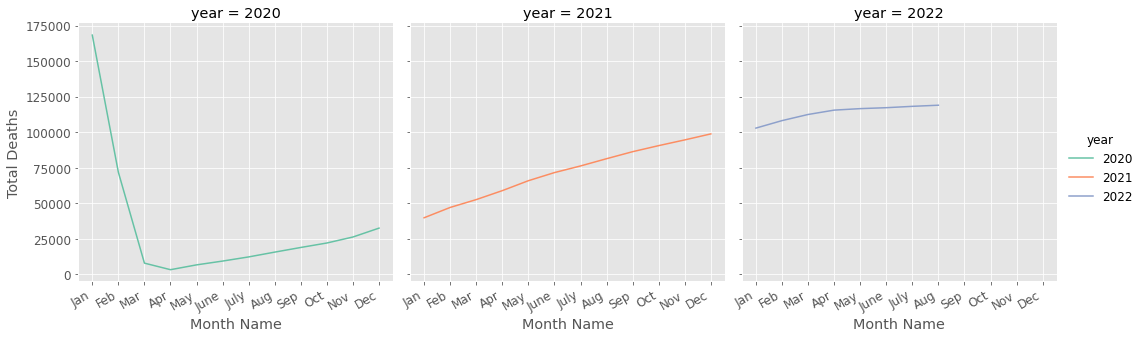

In [64]:
g1 = sns.relplot(
  data=df_deaths,
  x='month_name', y='total_deaths', ci=None, 
  col='year', hue='year', palette='Set2',
  kind='line'
)

g1.set(xlabel='Month Name', ylabel='Total Deaths')
g1.fig.autofmt_xdate()

# Tests Exploration

In [65]:
test_cols = ['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
             'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'year', 'month_num', 
             'month_name', 'day', 'day_name']

df_test = df_filled[test_cols]
df_test.head()

iso_code continent     location       date  new_tests  total_tests  \
0      AFG      Asia  Afghanistan 2020-02-24        NaN     924645.2   
1      AFG      Asia  Afghanistan 2020-02-25        NaN     924645.2   
2      AFG      Asia  Afghanistan 2020-02-26        NaN     924645.2   
3      AFG      Asia  Afghanistan 2020-02-27        NaN     924645.2   
4      AFG      Asia  Afghanistan 2020-02-28        NaN     924645.2   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.2118                     NaN           983.55396   
1                   23.2118                     NaN           983.55396   
2                   23.2118                     NaN           983.55396   
3                   23.2118                     NaN           983.55396   
4                   23.2118                     NaN           983.55396   

   new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  \
0                          0.02486        0.12974        19.62899         NaN   
1                          0.02486        0.12974        19.62899         NaN   
2                          0.02486        0.12974        19.62899         NaN   
3                          0.02486        0.12974        19.62899         NaN   
4                          0.02486        0.12974        19.62899         NaN   

   year  month_num month_name  day   day_name  
0  2020          2        Feb   24     Monday  
1  2020          2        Feb   25    Tuesday  
2  2020          2        Feb   26  Wednesday  
3  2020          2        Feb   27   Thursday  
4  2020          2        Feb   28     Friday

In [66]:
df_test[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
         'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units']].describe()

new_tests  total_tests  total_tests_per_thousand  \
count  1.37363e+05  1.64689e+05              164689.00000   
mean   4.74753e+04  3.07144e+07                 848.84259   
std    1.93300e+05  2.42644e+08                2195.41465   
min    1.00000e+00  0.00000e+00                   0.00000   
25%    9.74667e+02  1.94217e+05                  35.22200   
50%    4.74600e+03  9.24645e+05                 184.03700   
75%    2.27955e+04  5.32113e+06                 713.80730   
max    3.58556e+07  9.21400e+09               32925.90000   

       new_tests_per_thousand  new_tests_smoothed  \
count            137363.00000         1.61261e+05   
mean                  3.64033         1.22759e+05   
std                   9.28810         1.08242e+06   
min                   0.00000         0.00000e+00   
25%                   0.27300         6.39000e+02   
50%                   0.95900         3.45700e+03   
75%                   2.88250         2.17270e+04   
max                 534.01300         1.47700e+07   

       new_tests_smoothed_per_thousand  positive_rate  tests_per_case  
count                     161261.00000   155064.00000     1.54189e+05  
mean                           2.91917        0.09413     2.16816e+03  
std                            7.28194        0.10422     2.97169e+04  
min                            0.00000        0.00000     1.00000e+00  
25%                            0.15300        0.01878     9.90000e+00  
50%                            0.77800        0.06391     2.68624e+01  
75%                            2.63100        0.12974     7.99421e+01  
max                          147.60300        1.00000     1.02363e+06

In [67]:
df_test.isna().sum()                                   # check missing values

iso_code                                0
continent                           11958
location                                0
date                                    0
new_tests                           69481
total_tests                         42155
total_tests_per_thousand            42155
new_tests_per_thousand              69481
new_tests_smoothed                  45583
new_tests_smoothed_per_thousand     45583
positive_rate                       51780
tests_per_case                      52655
tests_units                        100058
year                                    0
month_num                               0
month_name                              0
day                                     0
day_name                                0
dtype: int64

<AxesSubplot:>

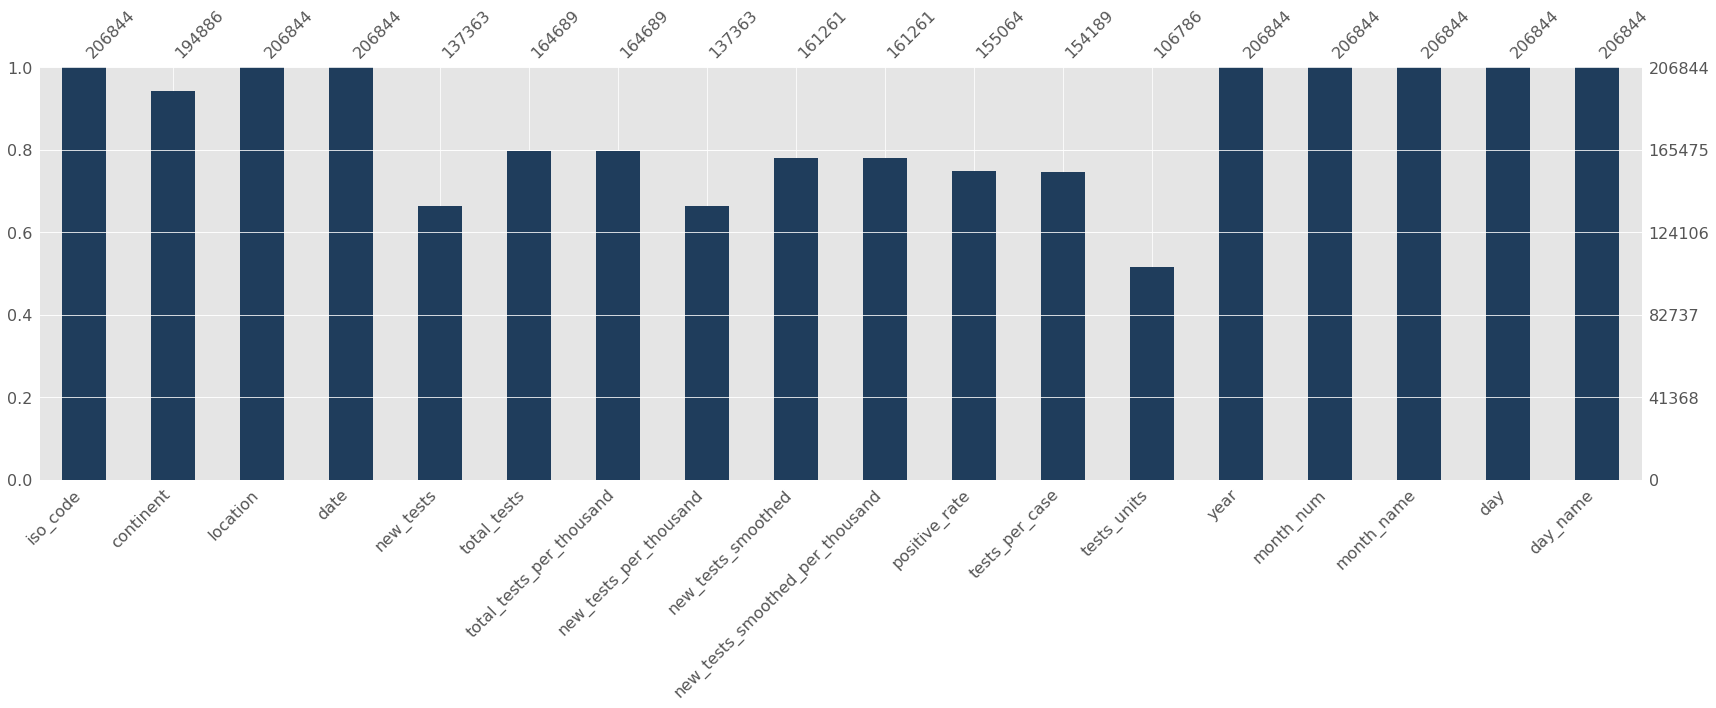

In [68]:
msno.bar(df_test, labels=True, color=(0.12, 0.24, 0.36))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

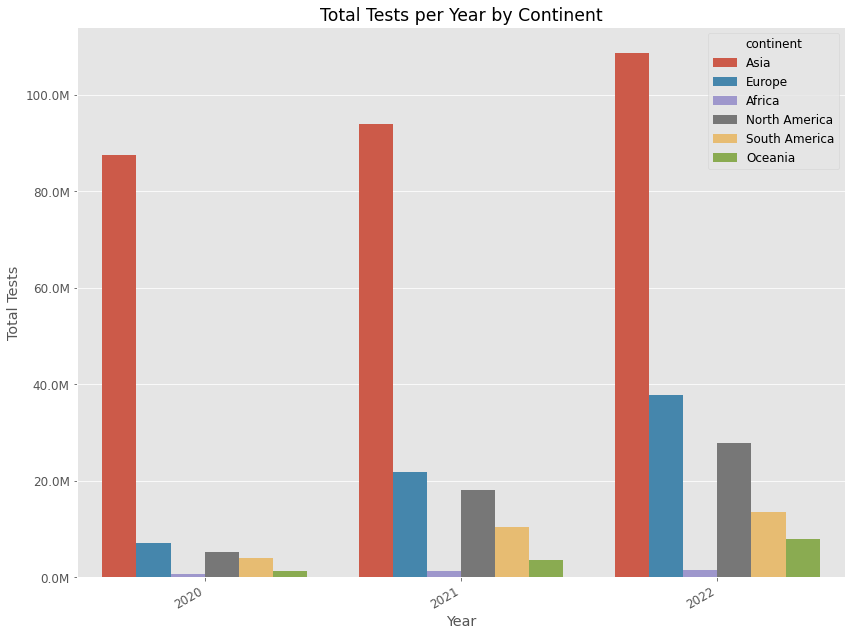

In [69]:
plot_bar(
    data=df_test,
    x='year', y='total_tests', hue='continent', 
    title='Total Tests per Year by Continent', xlabel='Year', ylabel='Total Tests', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

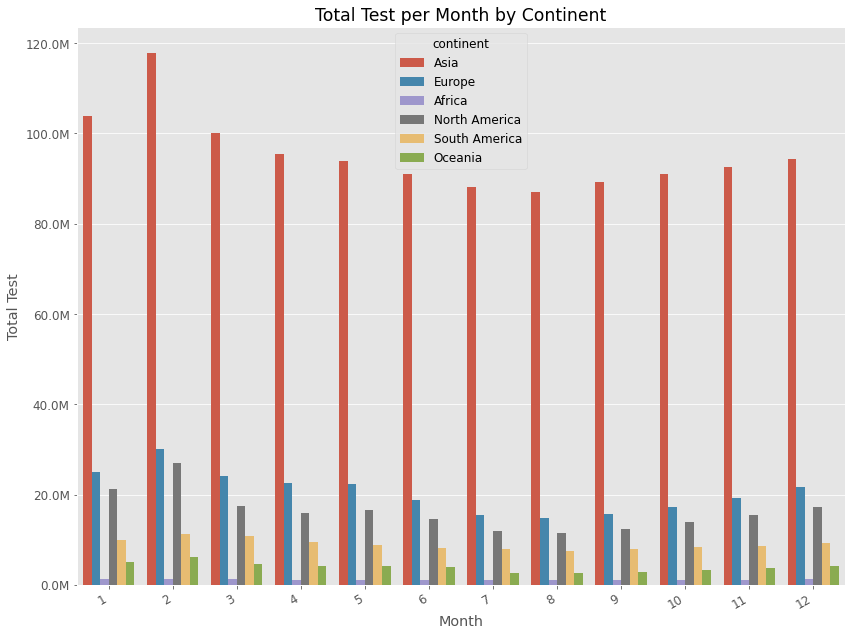

In [70]:
plot_bar(
    data=df_test,
    x='month_num', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

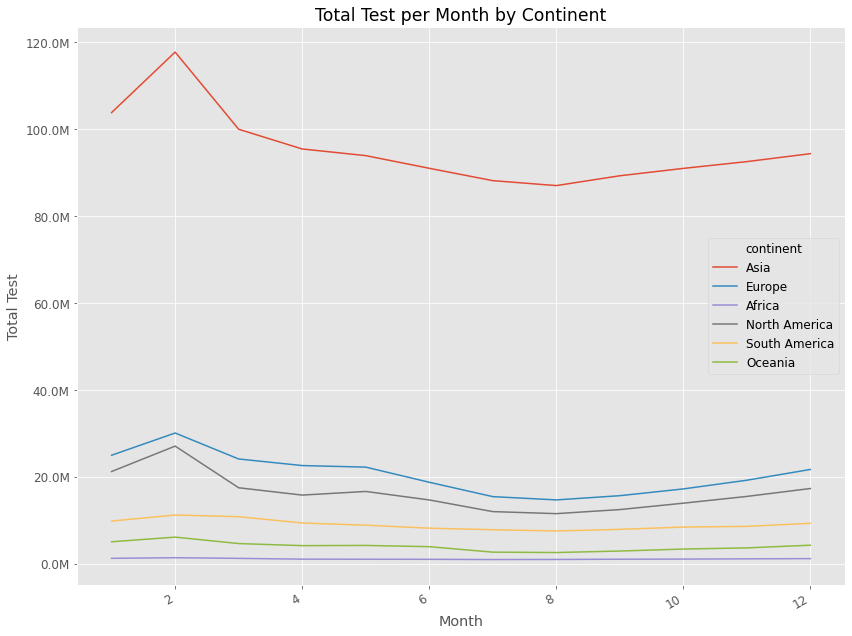

In [71]:
plot_line(
    data=df_test,
    x='month_num', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

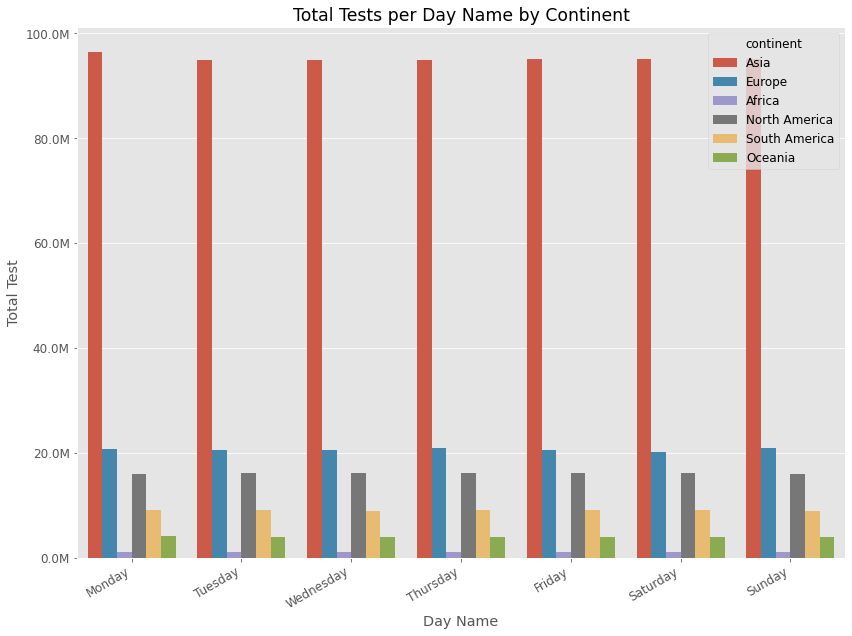

In [72]:
plot_bar(
    data=df_test,
    x='day_name', y='total_tests', hue='continent', 
    title='Total Tests per Day Name by Continent', xlabel='Day Name', ylabel='Total Test', 
    formatter=format_mill
)

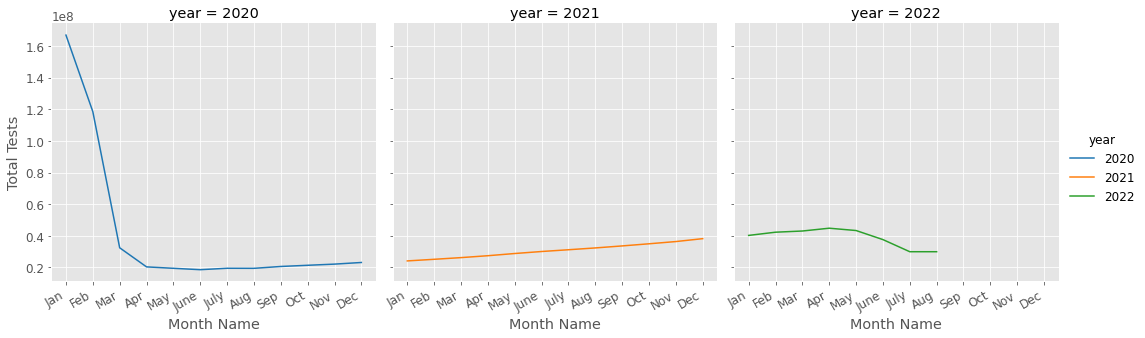

In [73]:
g2 = sns.relplot(
  data=df_test,
  x='month_name', y='total_tests', ci=None,
  col='year', hue='year', palette='tab10',
  kind='line'
)

g2.set(xlabel='Month Name', ylabel='Total Tests')
g2.fig.autofmt_xdate()

# Vaccinations Exploration

In [74]:
vacc_cols = ['iso_code', 'continent', 'location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
             'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
             'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
             'year', 'month_num', 'month_name', 'day', 'day_name']

df_vacc = df_filled[vacc_cols]
df_vacc.head()

iso_code continent     location       date  total_vaccinations  \
0      AFG      Asia  Afghanistan 2020-02-24         3.67439e+06   
1      AFG      Asia  Afghanistan 2020-02-25         3.67439e+06   
2      AFG      Asia  Afghanistan 2020-02-26         3.67439e+06   
3      AFG      Asia  Afghanistan 2020-02-27         3.67439e+06   
4      AFG      Asia  Afghanistan 2020-02-28         3.67439e+06   

   people_vaccinated  people_fully_vaccinated  total_boosters  \
0        3.27439e+06              3.09986e+06             NaN   
1        3.27439e+06              3.09986e+06             NaN   
2        3.27439e+06              3.09986e+06             NaN   
3        3.27439e+06              3.09986e+06             NaN   
4        3.27439e+06              3.09986e+06             NaN   

   new_vaccinations  new_vaccinations_smoothed  \
0           3531.25                   15358.35   
1           3531.25                   15358.35   
2           3531.25                   15358.35   
3           3531.25                   15358.35   
4           3531.25                   15358.35   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                         9.16323                        8.16557   
1                         9.16323                        8.16557   
2                         9.16323                        8.16557   
3                         9.16323                        8.16557   
4                         9.16323                        8.16557   

   people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                              7.73019                         NaN   
1                              7.73019                         NaN   
2                              7.73019                         NaN   
3                              7.73019                         NaN   
4                              7.73019                         NaN   

   new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
0                              383.06346                     13924.14808   
1                              383.06346                     13924.14808   
2                              383.06346                     13924.14808   
3                              383.06346                     13924.14808   
4                              383.06346                     13924.14808   

   new_people_vaccinated_smoothed_per_hundred  year  month_num month_name  \
0                                     0.03478  2020          2        Feb   
1                                     0.03478  2020          2        Feb   
2                                     0.03478  2020          2        Feb   
3                                     0.03478  2020          2        Feb   
4                                     0.03478  2020          2        Feb   

   day   day_name  
0   24     Monday  
1   25    Tuesday  
2   26  Wednesday  
3   27   Thursday  
4   28     Friday

In [75]:
df_vacc[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
         'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
         'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']].describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count         1.97678e+05        1.97678e+05              1.97678e+05   
mean          1.21382e+08        6.01159e+07              5.05119e+07   
std           6.86108e+08        3.26865e+08              2.80570e+08   
min           0.00000e+00        0.00000e+00              1.00000e+00   
25%           3.36032e+05        2.12469e+05              1.68225e+05   
50%           2.32182e+06        1.28978e+06              1.22099e+06   
75%           1.36924e+07        7.09986e+06              6.41205e+06   
max           1.23991e+10        5.31103e+09              4.88066e+09   

       total_boosters  new_vaccinations  new_vaccinations_smoothed  \
count     1.74383e+05       1.64442e+05                1.97678e+05   
mean      1.87685e+07       4.94040e+05                4.00133e+05   
std       1.03165e+08       2.45581e+06                2.21214e+06   
min       1.00000e+00       0.00000e+00                0.00000e+00   
25%       3.92518e+04       3.08600e+03                1.11300e+03   
50%       4.79754e+05       1.59164e+04                8.20300e+03   
75%       4.02631e+06       9.24663e+04                5.84678e+04   
max       2.29668e+09       4.96671e+07                4.36879e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    197678.00000                   197678.00000   
mean                         74.32381                       37.27530   
std                          58.16715                       24.87220   
min                           0.00000                        0.00000   
25%                          21.92698                       14.58943   
50%                          67.99783                       37.49442   
75%                         111.70000                       55.84533   
max                         366.87000                      128.78000   

       people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
count                         197678.00000                174383.00000   
mean                              32.65531                    18.61310   
std                               23.16527                    18.98342   
min                                0.00000                     0.00000   
25%                               11.82885                     2.19964   
50%                               30.35143                    12.90000   
75%                               49.53484                    29.75915   
max                              126.79000                   134.27000   

       new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
count                           197678.00000                     1.97678e+05   
mean                              2778.30003                     1.54828e+05   
std                               3249.21147                     8.84421e+05   
min                                  0.00000                     0.00000e+00   
25%                                651.90792                     4.09000e+02   
50%                               2062.00000                     4.05286e+03   
75%                               3735.00000                     2.36875e+04   
max                             117862.00000                     2.10691e+07   

       new_people_vaccinated_smoothed_per_hundred  
count                                197678.00000  
mean                                      0.12127  
std                                       0.18929  
min                                       0.00000  
25%                                       0.02560  
50%                                       0.08400  
75%                                       0.14500  
max                                      11.78600

In [76]:
df_vacc.isna().sum()                                   # check missing values

iso_code                                          0
continent                                     11958
location                                          0
date                                              0
total_vaccinations                             9166
people_vaccinated                              9166
people_fully_vaccinated                        9166
total_boosters                                32461
new_vaccinations                              42402
new_vaccinations_smoothed                      9166
total_vaccinations_per_hundred                 9166
people_vaccinated_per_hundred                  9166
people_fully_vaccinated_per_hundred            9166
total_boosters_per_hundred                    32461
new_vaccinations_smoothed_per_million          9166
new_people_vaccinated_smoothed                 9166
new_people_vaccinated_smoothed_per_hundred     9166
year                                              0
month_num                                         0
month_name  

<AxesSubplot:>

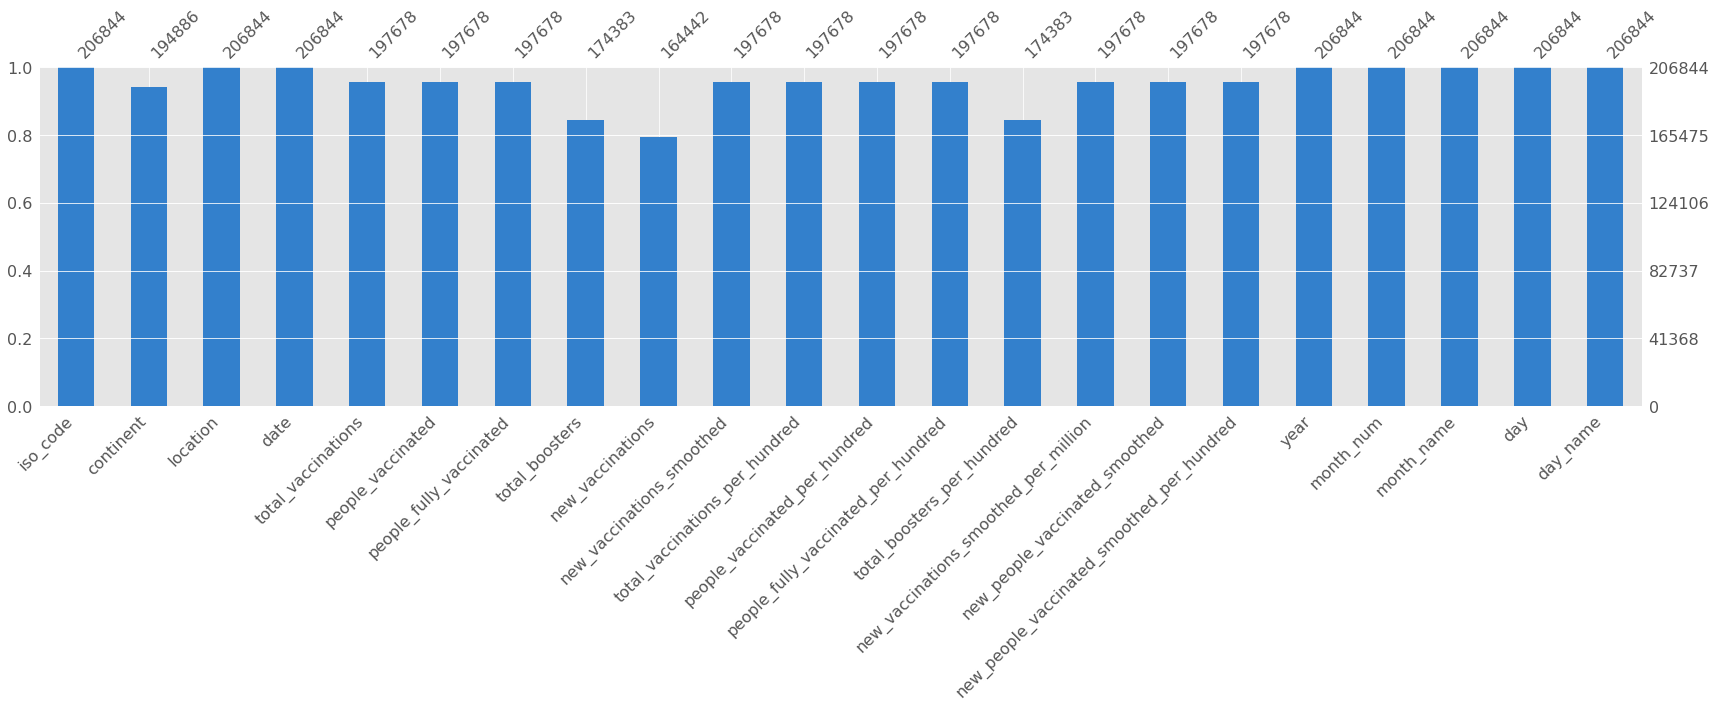

In [77]:
msno.bar(df_vacc, labels=True, color=(0.20, 0.50, 0.80))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

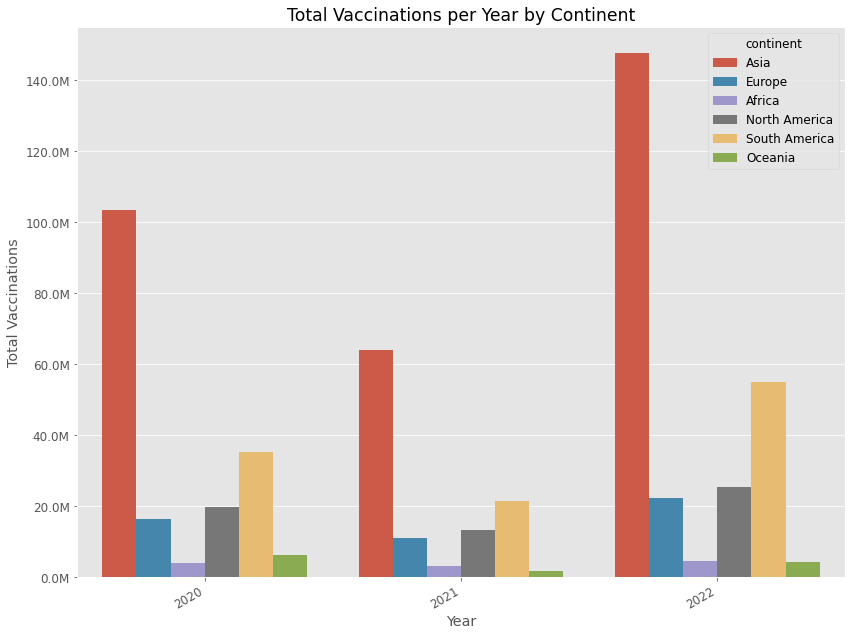

In [78]:
plot_bar(
    data=df_vacc,
    x='year', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Year by Continent', xlabel='Year', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

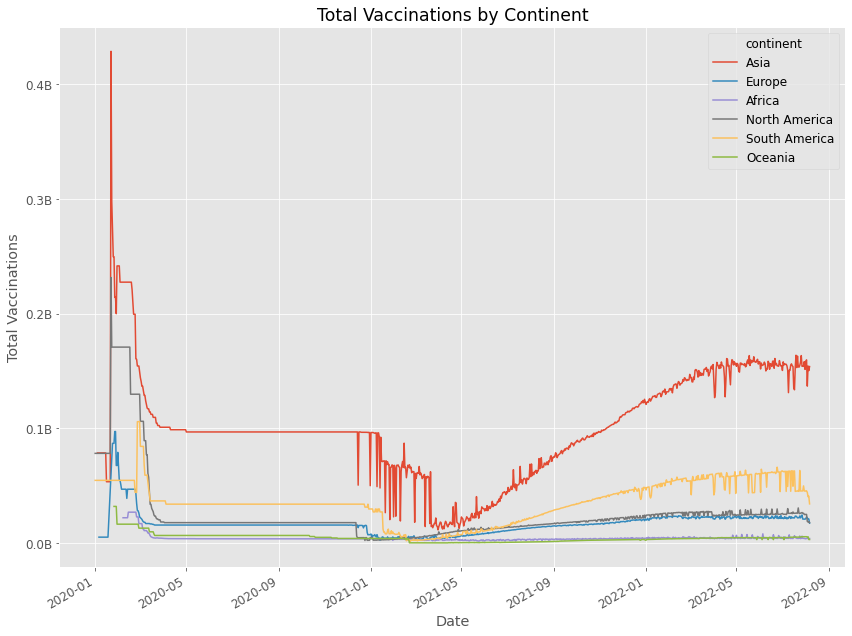

In [79]:
plot_line(
    data=df_vacc,
    x='date', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations by Continent', xlabel='Date', ylabel='Total Vaccinations', 
    formatter=format_bill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

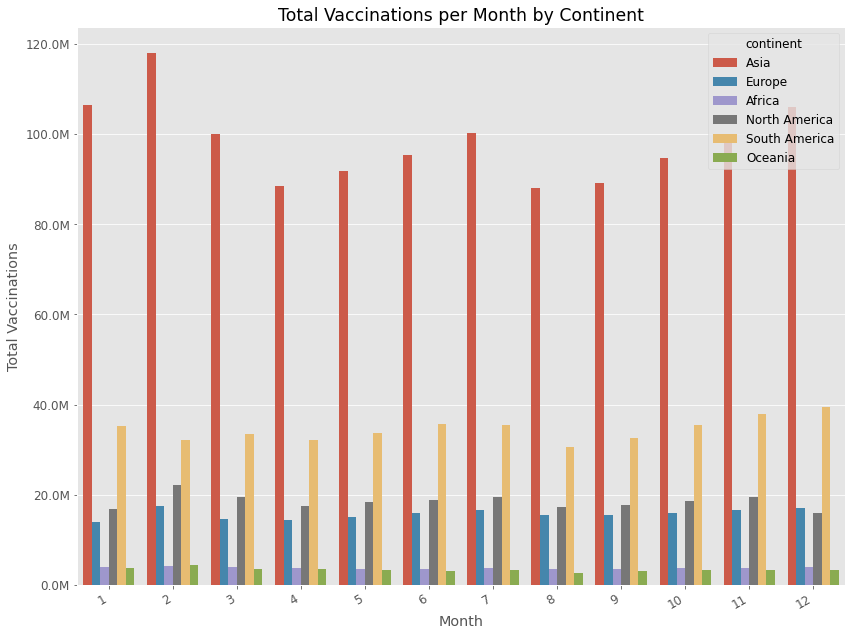

In [80]:
plot_bar(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

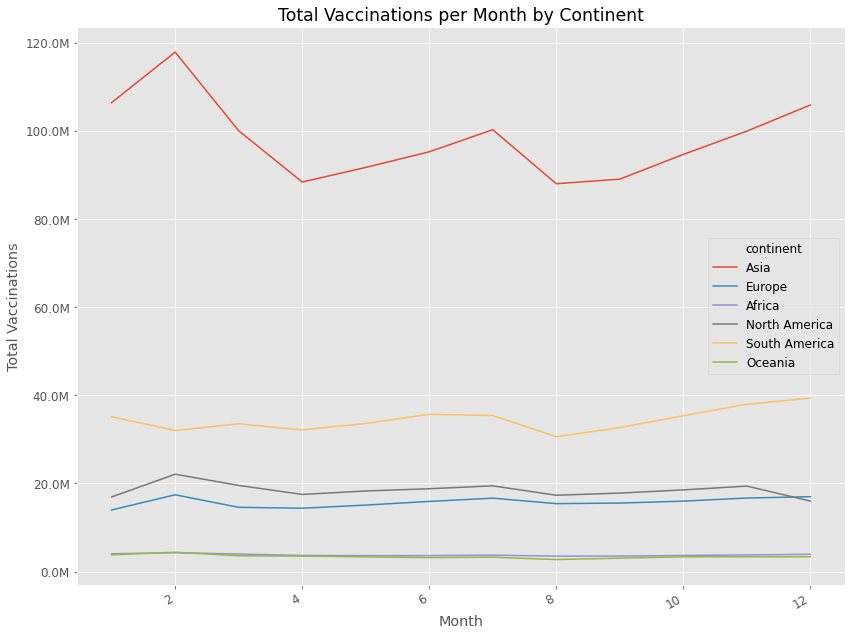

In [81]:
plot_line(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

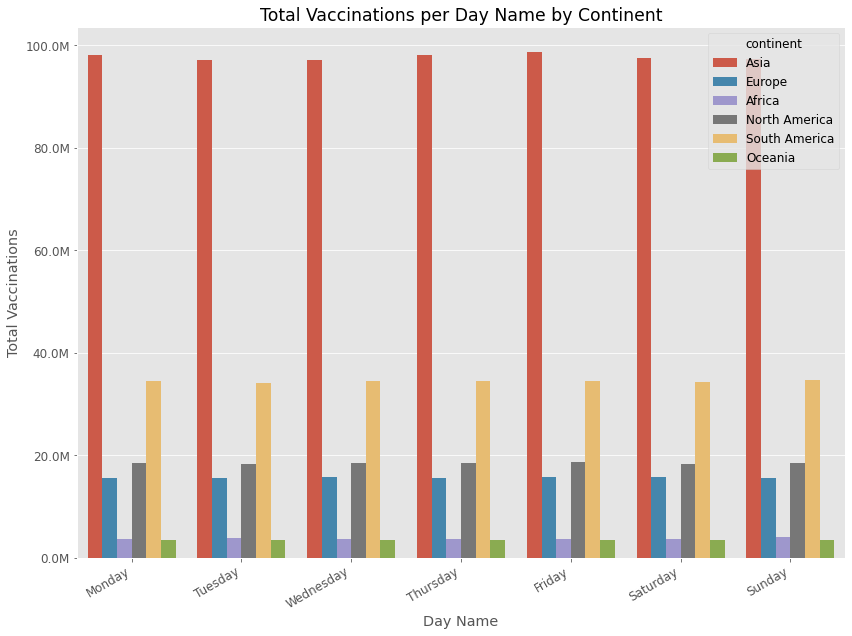

In [82]:
plot_bar(
    data=df_vacc,
    x='day_name', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Day Name by Continent', xlabel='Day Name', ylabel='Total Vaccinations', 
    formatter=format_mill
)

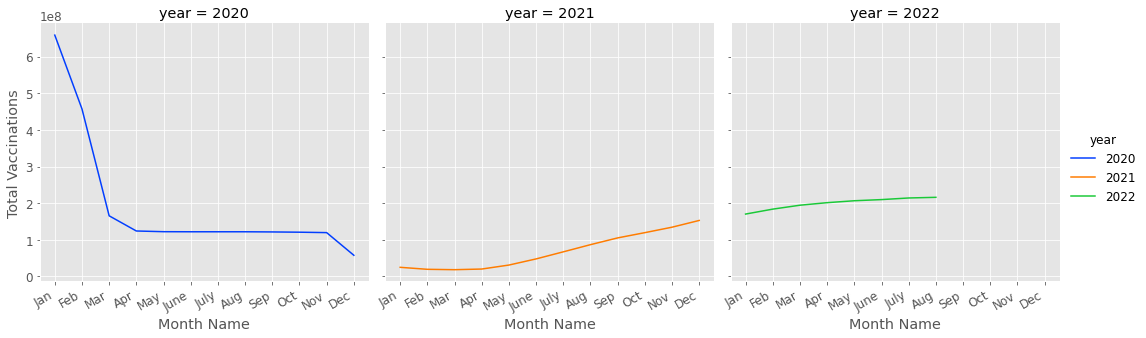

In [83]:
g3 = sns.relplot(
  data=df_vacc,
  x='month_name', y='total_vaccinations', ci=None,
  col='year', hue='year', palette='bright',
  kind='line'
)

g3.set(xlabel='Month Name', ylabel='Total Vaccinations')
g3.fig.autofmt_xdate()

# Demographics Exploration

In [84]:
demo_cols = ['iso_code', 'continent', 'location', 'date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
             'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
             'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index','excess_mortality_cumulative_absolute', 
             'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million', 'year', 'month_num', 'month_name', 
             'day', 'day_name']

df_demo = df_filled[demo_cols]
df_demo.head()

iso_code continent     location       date  population  population_density  \
0      AFG      Asia  Afghanistan 2020-02-24  40099462.0              54.422   
1      AFG      Asia  Afghanistan 2020-02-25  40099462.0              54.422   
2      AFG      Asia  Afghanistan 2020-02-26  40099462.0              54.422   
3      AFG      Asia  Afghanistan 2020-02-27  40099462.0              54.422   
4      AFG      Asia  Afghanistan 2020-02-28  40099462.0              54.422   

   median_age  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
0        18.6          2.581          1.337        1803.987              NaN   
1        18.6          2.581          1.337        1803.987              NaN   
2        18.6          2.581          1.337        1803.987              NaN   
3        18.6          2.581          1.337        1803.987              NaN   
4        18.6          2.581          1.337        1803.987              NaN   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                597.029                 9.59             NaN           NaN   
1                597.029                 9.59             NaN           NaN   
2                597.029                 9.59             NaN           NaN   
3                597.029                 9.59             NaN           NaN   
4                597.029                 9.59             NaN           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                  37.746                         0.5            64.83   
1                  37.746                         0.5            64.83   
2                  37.746                         0.5            64.83   
3                  37.746                         0.5            64.83   
4                  37.746                         0.5            64.83   

   human_development_index  excess_mortality_cumulative_absolute  \
0                    0.511                                   NaN   
1                    0.511                                   NaN   
2                    0.511                                   NaN   
3                    0.511                                   NaN   
4                    0.511                                   NaN   

   excess_mortality_cumulative  excess_mortality  \
0                          NaN               NaN   
1                          NaN               NaN   
2                          NaN               NaN   
3                          NaN               NaN   
4                          NaN               NaN   

   excess_mortality_cumulative_per_million  year  month_num month_name  day  \
0                                      NaN  2020          2        Feb   24   
1                                      NaN  2020          2        Feb   25   
2                                      NaN  2020          2        Feb   26   
3                                      NaN  2020          2        Feb   27   
4                                      NaN  2020          2        Feb   28   

    day_name  
0     Monday  
1    Tuesday  
2  Wednesday  
3   Thursday  
4     Friday

In [85]:
df_demo[['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
         'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 
         'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 
         'excess_mortality_cumulative_per_million']].describe()

population  population_density    median_age  aged_65_older  \
count  2.05615e+05        184066.00000  170558.00000   168755.00000   
mean   1.43220e+08           457.36102      30.64012        8.82091   
std    6.96147e+08          2109.04668       9.06507        6.13101   
min    4.70000e+01             0.13700      15.10000        1.14400   
25%    8.96007e+05            37.72800      22.30000        3.52600   
50%    7.49458e+06            88.12500      30.60000        6.70400   
75%    3.35739e+07           214.24300      39.10000       14.17800   
max    7.90930e+09         20546.76600      48.20000       27.04900   

       aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count   169665.00000    169569.00000     110606.00000           170134.00000   
mean         5.56434     19601.39407         13.62803              260.96536   
std          4.16455     20564.04149         20.03492              119.92483   
min          0.52600       661.24000          0.10000               79.37000   
25%          2.06300      4449.89800          0.60000              170.05000   
50%          4.20900     12951.83900          2.20000              243.96400   
75%          8.67800     27936.89600         21.35000              329.94200   
max         18.49300    116935.60000         77.60000              724.41700   

       diabetes_prevalence  female_smokers  male_smokers  \
count         178574.00000    128684.00000  126921.00000   
mean               8.36590        10.65970      32.80079   
std                4.69448        10.60459      13.53273   
min                0.99000         0.10000       7.70000   
25%                5.31000         1.90000      21.60000   
50%                7.20000         6.30000      31.40000   
75%               10.59000        19.30000      41.30000   
max               30.53000        44.00000      78.10000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count             83557.00000                151171.00000     193496.00000   
mean                 50.87634                     3.08495         73.64474   
std                  31.84720                     2.55106          7.44903   
min                   1.18800                     0.10000         53.28000   
25%                  20.85900                     1.30000         69.50000   
50%                  49.83900                     2.50000         75.05000   
75%                  82.50200                     4.00000         79.07000   
max                 100.00000                    13.80000         86.75000   

       human_development_index  excess_mortality_cumulative_absolute  \
count             165698.00000                           1.01905e+05   
mean                   0.72500                           3.31003e+04   
std                    0.14971                           9.35046e+04   
min                    0.39400                          -3.77261e+04   
25%                    0.60200                           7.39655e+01   
50%                    0.74300                           4.52791e+03   
75%                    0.84500                           1.91333e+04   
max                    0.95700                           1.21908e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 101905.00000      101905.00000   
mean                       9.09067          15.75644   
std                       11.79639          14.31893   
min                      -28.45000         -95.92000   
25%                        1.25429           5.75074   
50%                        6.50591          12.80426   
75%                       14.20000          24.43828   
max                       76.55000         375.98000   

       excess_mortality_cumulative_per_million  
count                             101905.00000  
mean                                1009.92994  
std                                 1174.16751  
min                                -1694.14612  
25% 

In [86]:
df_demo.isna().sum()                                   # check missing values

iso_code                                        0
continent                                   11958
location                                        0
date                                            0
population                                   1229
population_density                          22778
median_age                                  36286
aged_65_older                               38089
aged_70_older                               37179
gdp_per_capita                              37275
extreme_poverty                             96238
cardiovasc_death_rate                       36710
diabetes_prevalence                         28270
female_smokers                              78160
male_smokers                                79923
handwashing_facilities                     123287
hospital_beds_per_thousand                  55673
life_expectancy                             13348
human_development_index                     41146
excess_mortality_cumulative_absolute       104939


<AxesSubplot:>

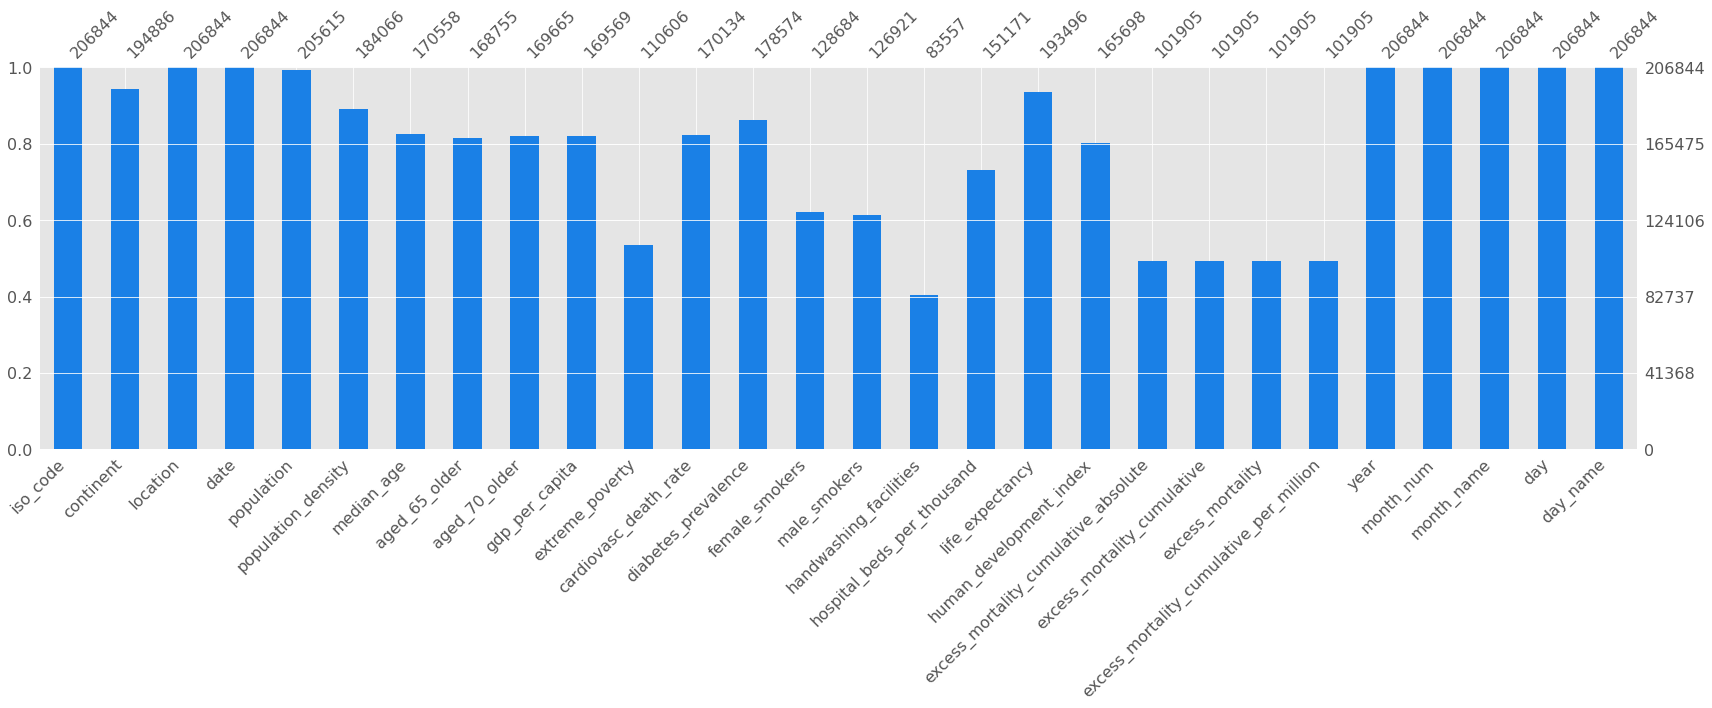

In [87]:
msno.bar(df_demo, labels=True, color=(0.1, 0.5, 0.9))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

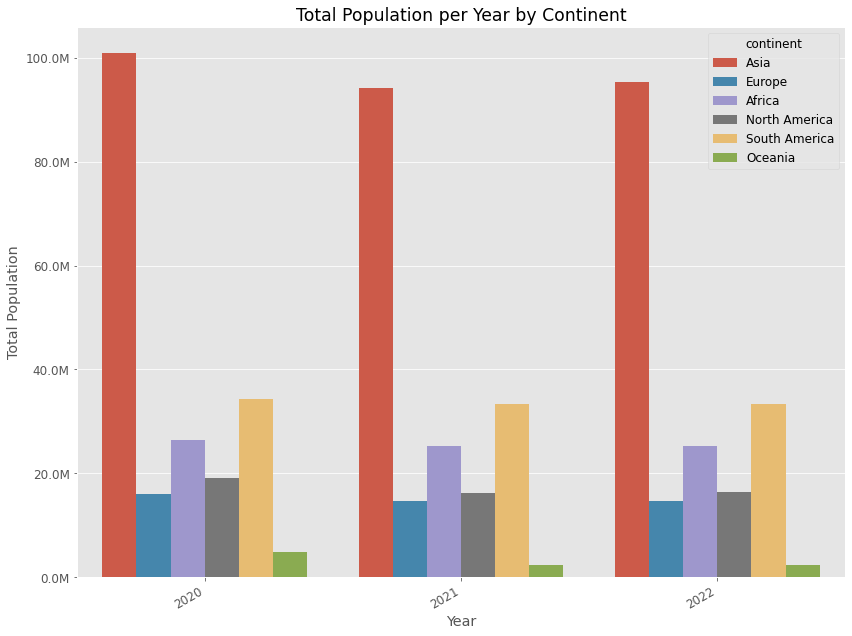

In [88]:
plot_bar(
    data=df_demo,
    x='year', y='population', hue='continent', 
    title='Total Population per Year by Continent', xlabel='Year', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

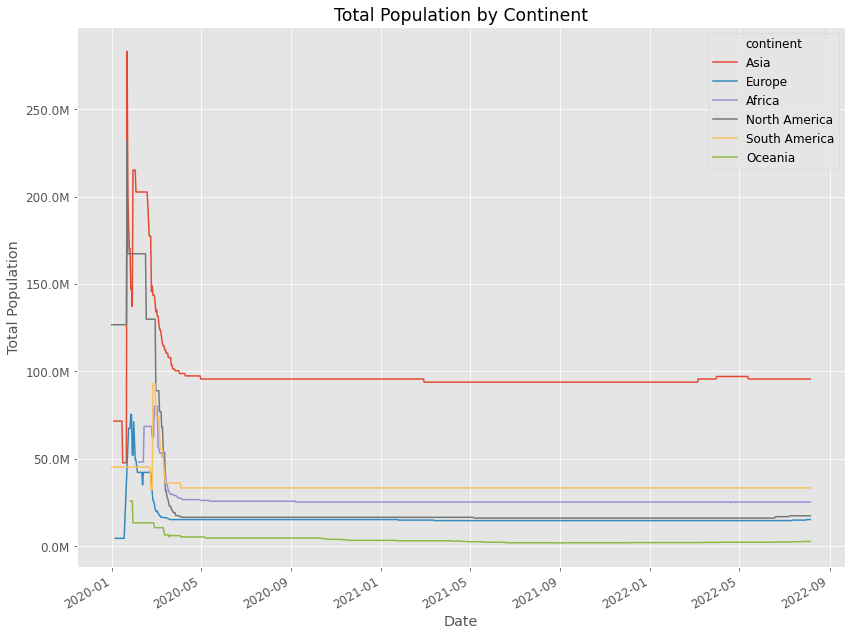

In [89]:
plot_line(
    data=df_demo,
    x='date', y='population', hue='continent', 
    title='Total Population by Continent', xlabel='Date', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

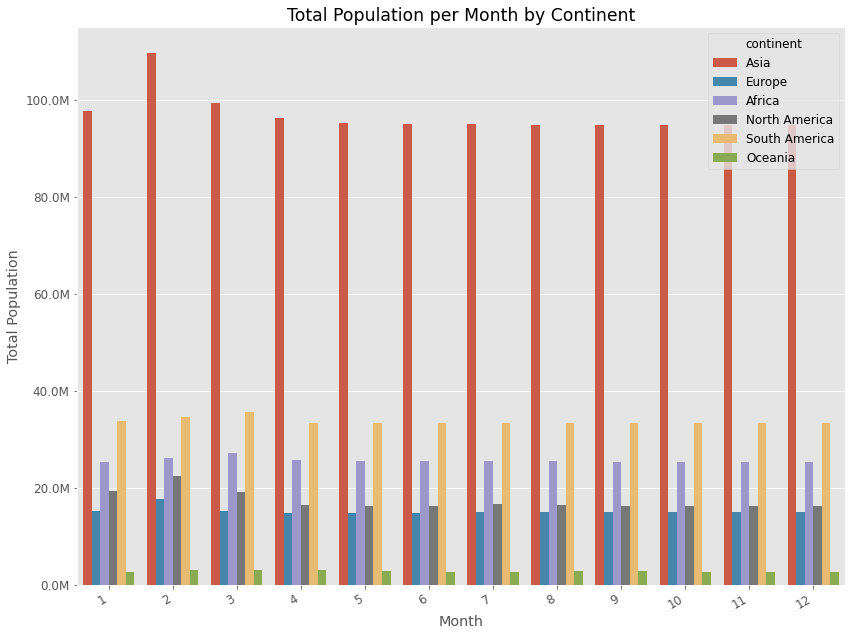

In [90]:
plot_bar(
    data=df_demo,
    x='month_num', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

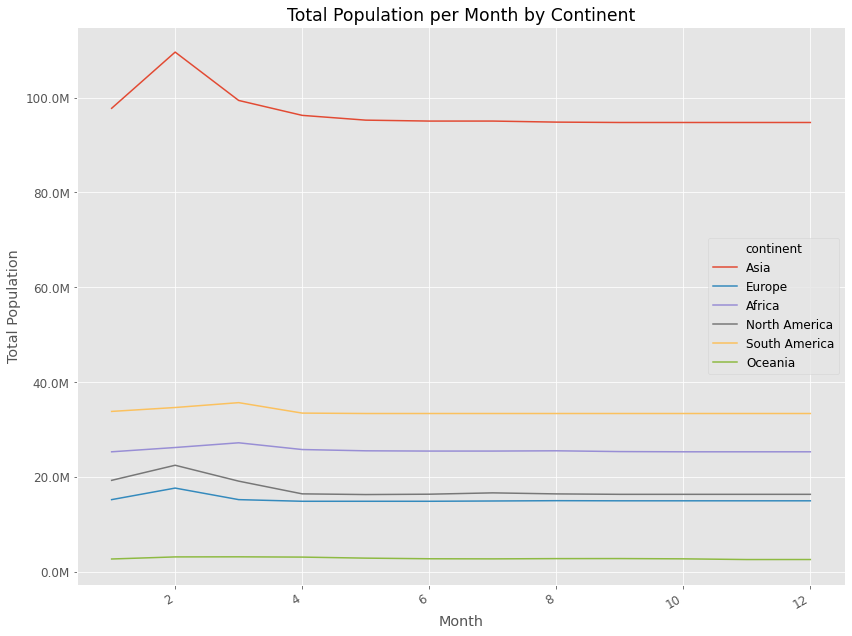

In [91]:
plot_line(
    data=df_demo,
    x='month_num', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

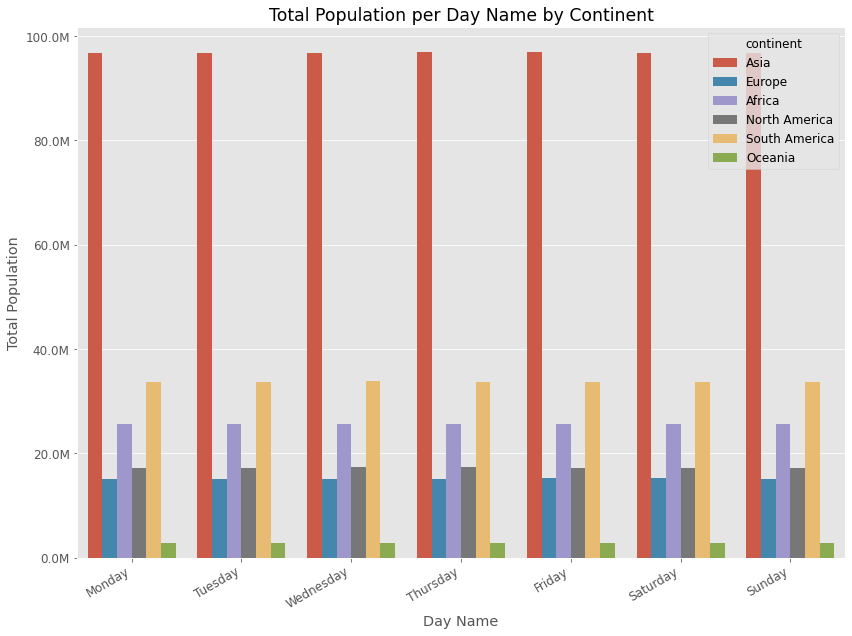

In [92]:
plot_bar(
    data=df_demo,
    x='day_name', y='population', hue='continent', 
    title='Total Population per Day Name by Continent', xlabel='Day Name', ylabel='Total Population', 
    formatter=format_mill
)

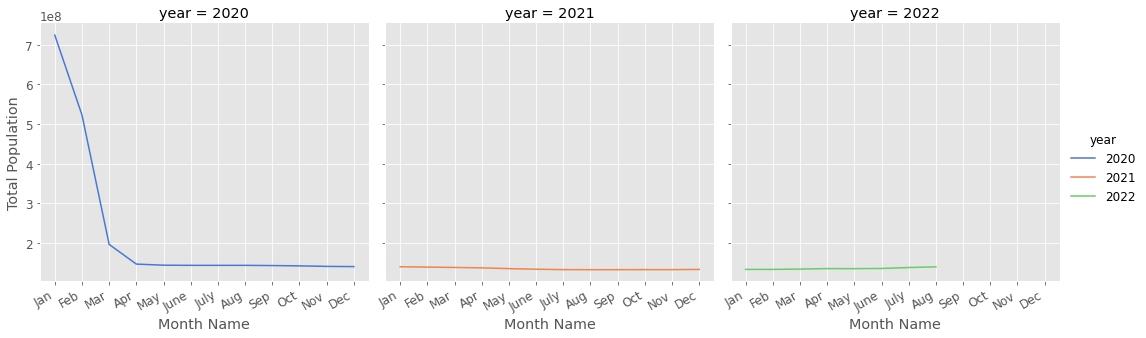

In [93]:
g4 = sns.relplot(
  data=df_demo,
  x='month_name', y='population', ci=None,
  col='year', hue='year', palette='muted',
  kind='line'
)

g4.set(xlabel='Month Name', ylabel='Total Population')
g4.fig.autofmt_xdate()

# Date Truncating or Indexing

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

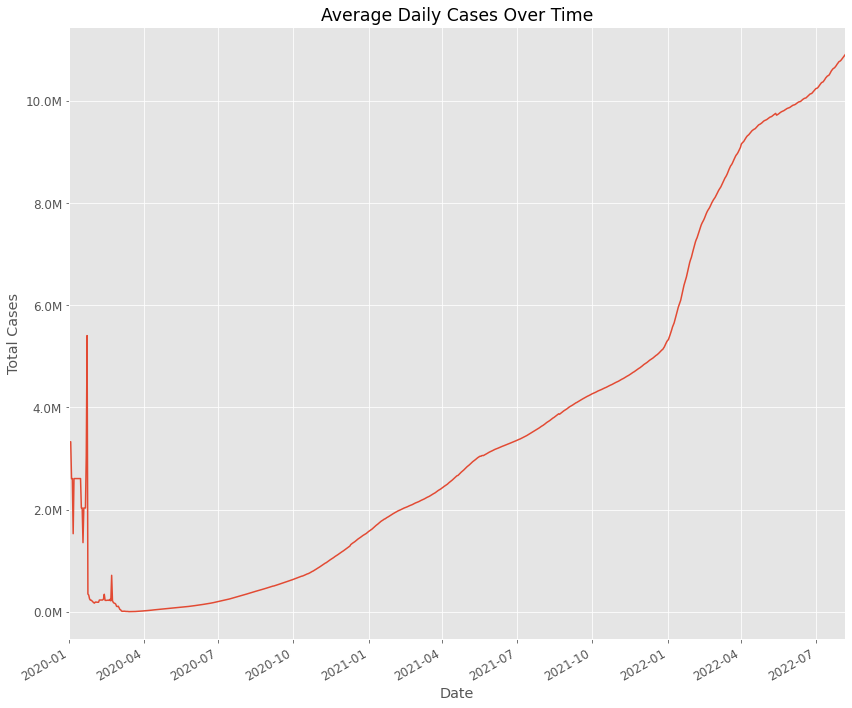

In [94]:
plot_date_rng(
    data=get_data(data=df_filled, rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Daily Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

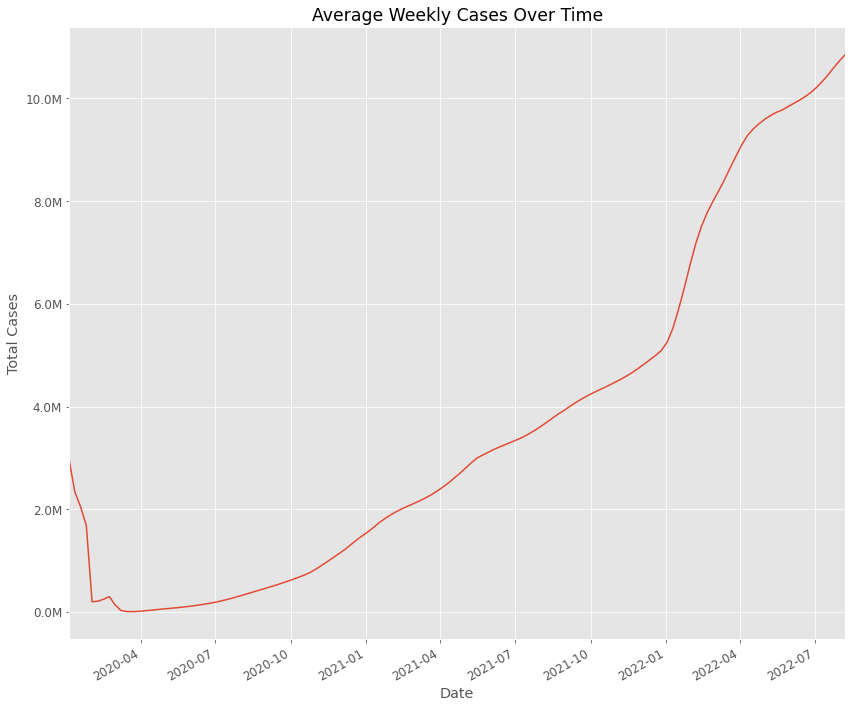

In [95]:
plot_date_rng(
    data=get_data(data=df_filled, rule='W').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Weekly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

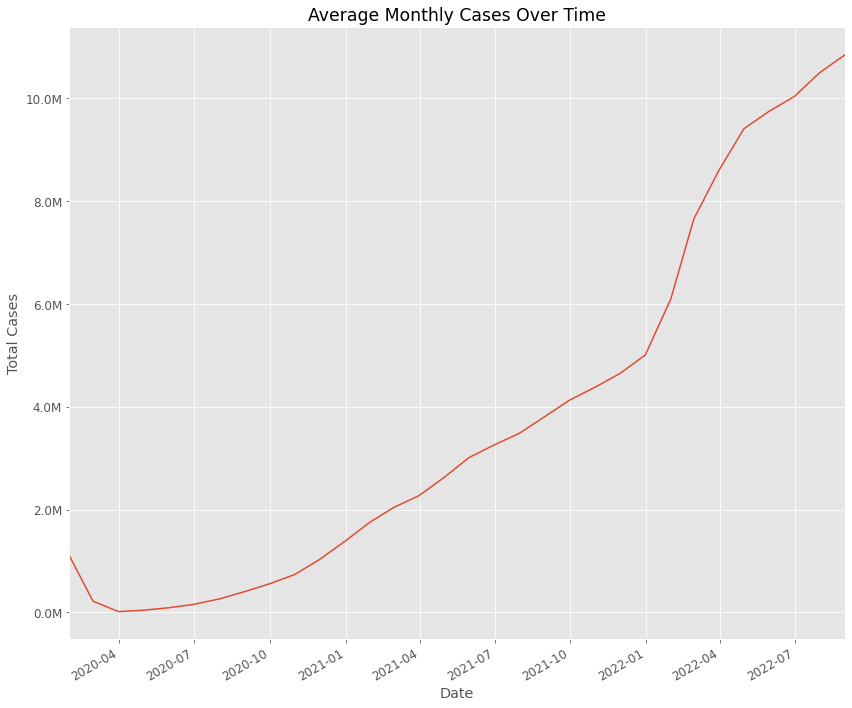

In [96]:
plot_date_rng(
    data=get_data(data=df_filled, rule='M').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Monthly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

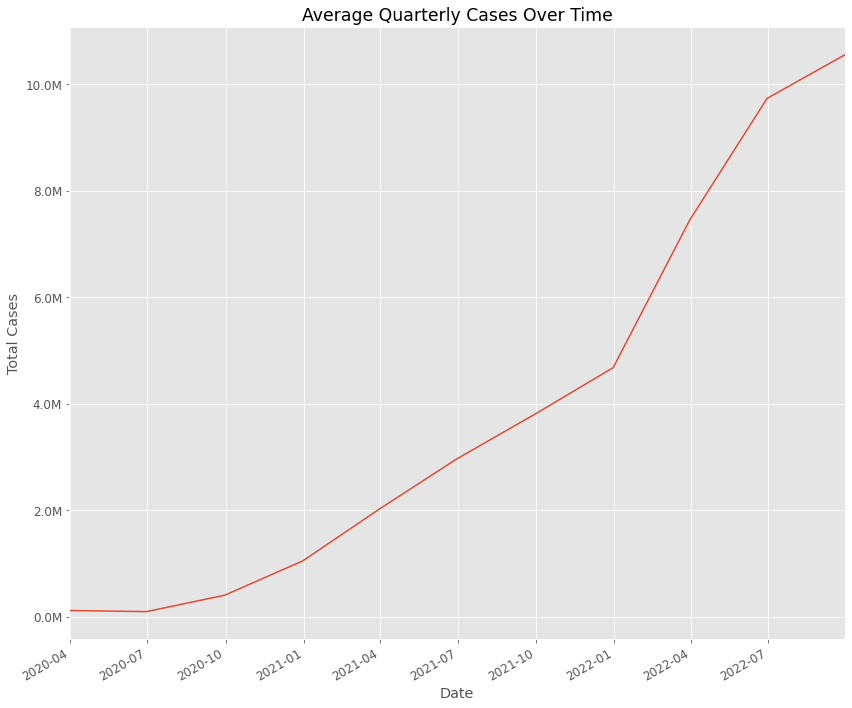

In [97]:
plot_date_rng(
    data=get_data(data=df_filled, rule='Q').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Quarterly Cases Over Time',
    formatter=format_mill
)

Plot Specific Date Range

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

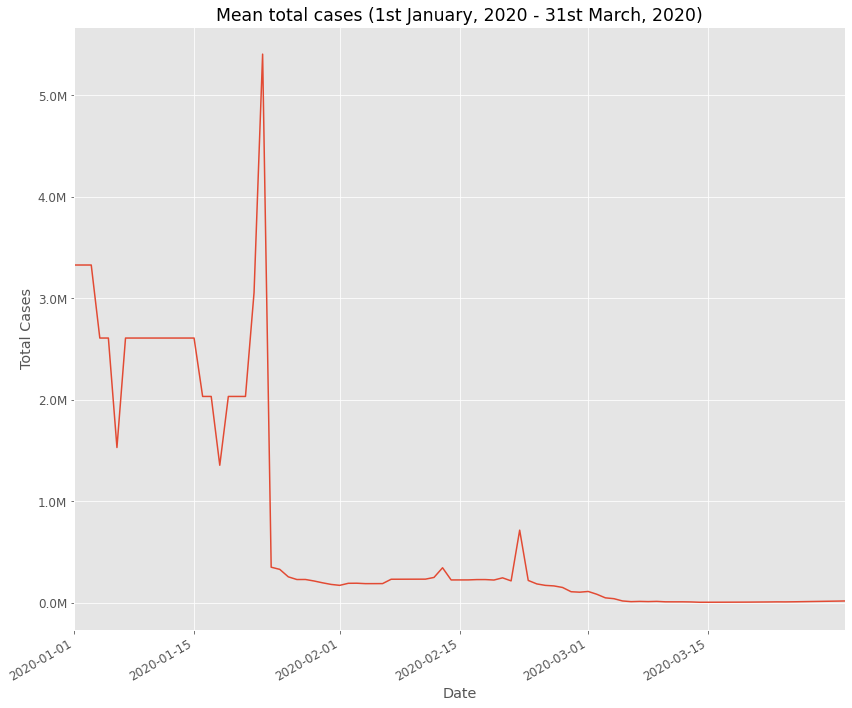

In [98]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-03-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st March, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

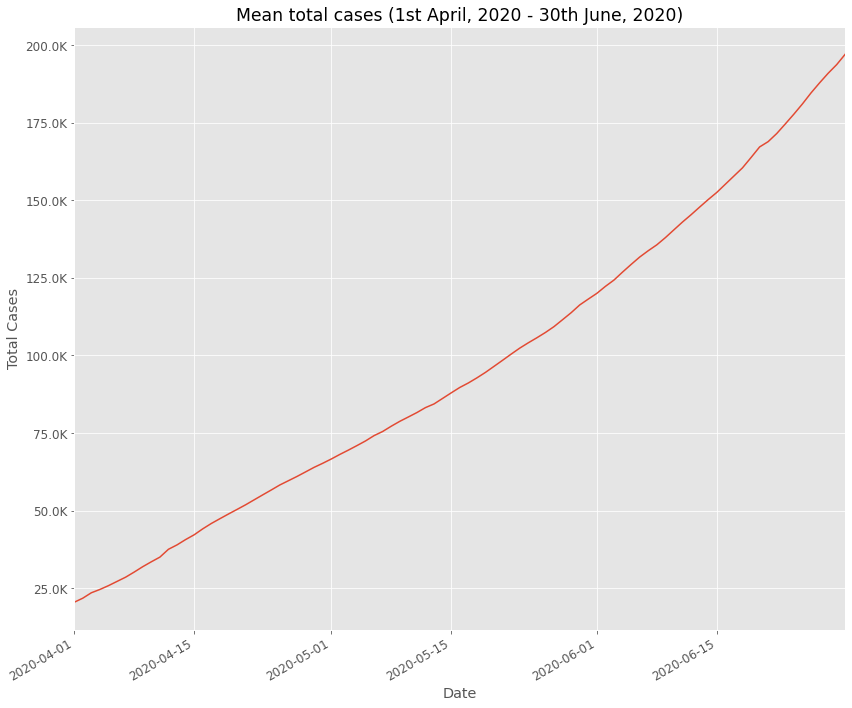

In [99]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-04-01', after='2020-06-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st April, 2020 - 30th June, 2020)',
    formatter=format_tsd
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

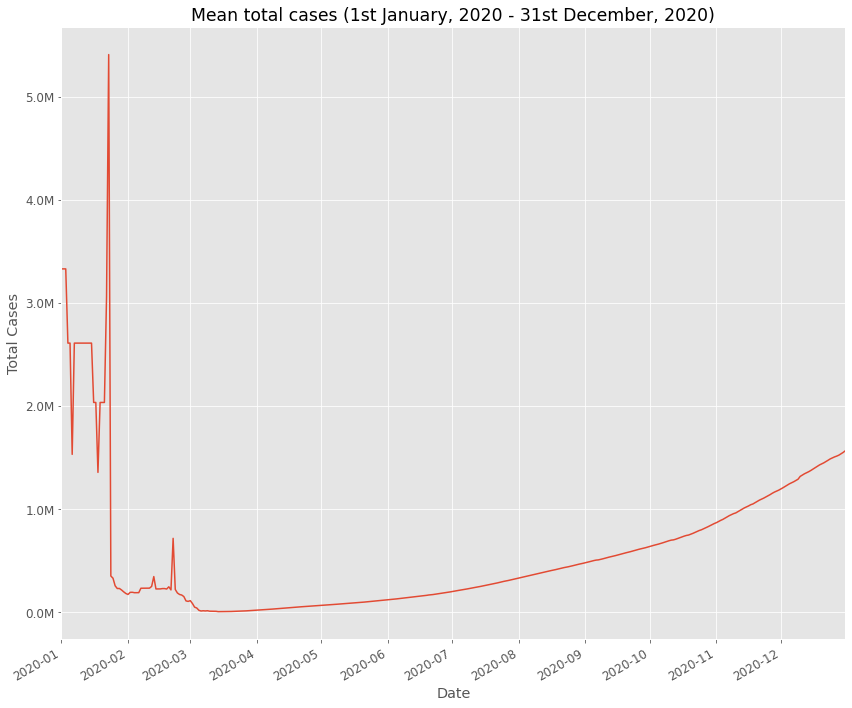

In [100]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st December, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

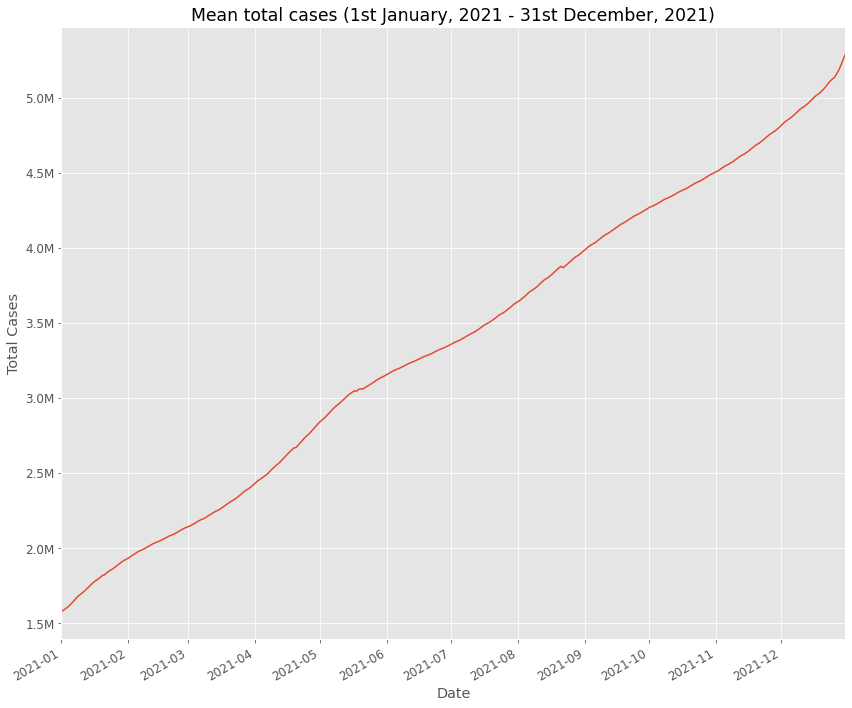

In [101]:
plot_date_rng(
    data=get_data(data=df_filled, before='2021-01-01', after='2021-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2021 - 31st December, 2021)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

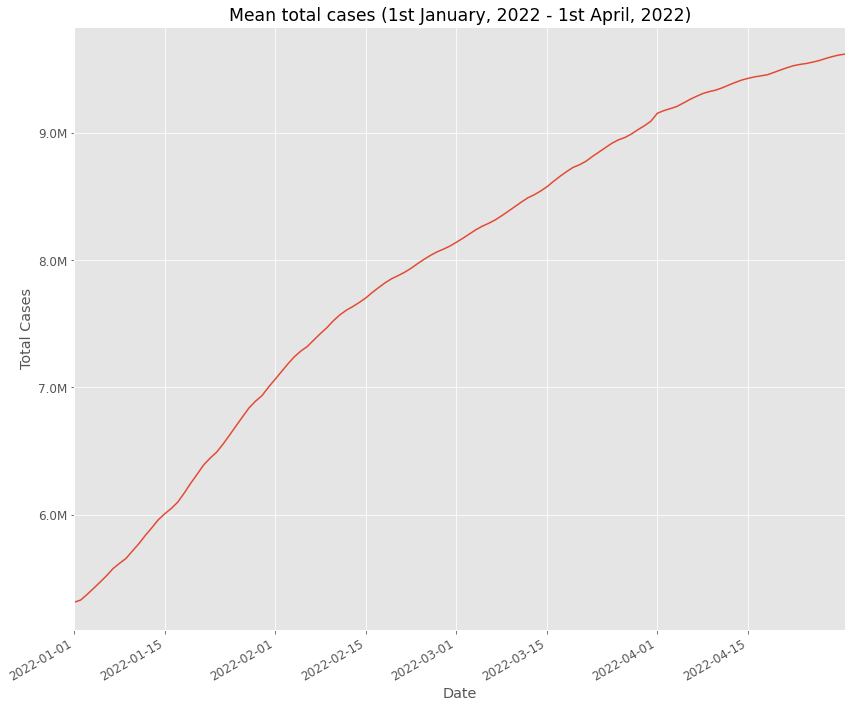

In [102]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-01-01', after='2022-04-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2022 - 1st April, 2022)',
    formatter=format_mill
)